# Predicting Glacier Sensitivity to Climate Change

## Overview

This project aimed to determine how sensitive Arctic glaciers are to temperature increase through analysis and modelling of large glacier change datasets (>20k points) across a diverse range of climatic and geographical regions. 

# Table of Contents

## 1. Introduction 
## 2. Data Overview 
### i) Glacier Summary Data 
### ii) Climate Data 
### iii) Glacier Mass Balance Data
## 3. Model Overview 
## 4. Model Calibration/Validation 
## 5. Analysis of Modelled Results 
## 6. Conclusions 
## 7. References 

## 1. Introduction

Climate change and global warming have become a a global problem; over the next 100 years, global air temperatures are expected to rise up to 5°C from the 1986-2005 average and the Arctic region is expected to experience temperature increase 2.4 times the magnitude of global average warming (Cohen et al., 2014). In response to past and present warming, the rate of global sea level rise has increased 3 times in the past 25 years in comparison to the 20th century average (Horton et al., 2018). 

Approximately 70% of sea level rise is attributed to melt from of glaciers and ice caps (Slangen et al., 2017). Arctic glaciers outside of Greenland currently account for the majority (62%) of global glacial melt (Zemp et al. 2019) and the meltwater contribution from Arctic glaciers is likely to increase due to the disproportionate temperature increase expected in the region. It has therefore become increasingly important to understand the past and present rates of Arctic glacier mass loss, and how sensitive glaciers in this region are to potential future increases in temperature. 

## 2. Data Overview 

In attempt to determine how sensitive Arctic glaciers are to temprature increase, I analyzed modelled a number of publically available datasets that would help similuate the real climatic and geographic conditions experienced by the glaciers of interest. 

### i) Glacier Summary Data

Summary data for the glaciers of interest were obtained from the Randolph Glacier Inventory (RGI)- which contained the latitude, longitute, glacier identification numbers, and total glacier area. More detailed information about individual glacier width and thickness at 10m elevation bands were obtained from Huss (SOURCE)

Let's take a look at these data

First, I will import libraries used through this entire project, so they are in one place for reference and establish a universal filepath from which I can draw all relevant data. 

In [1]:
import os 
import netCDF4 as nc 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy as car
import glob 
%matplotlib inline
filepath=os.getcwd()

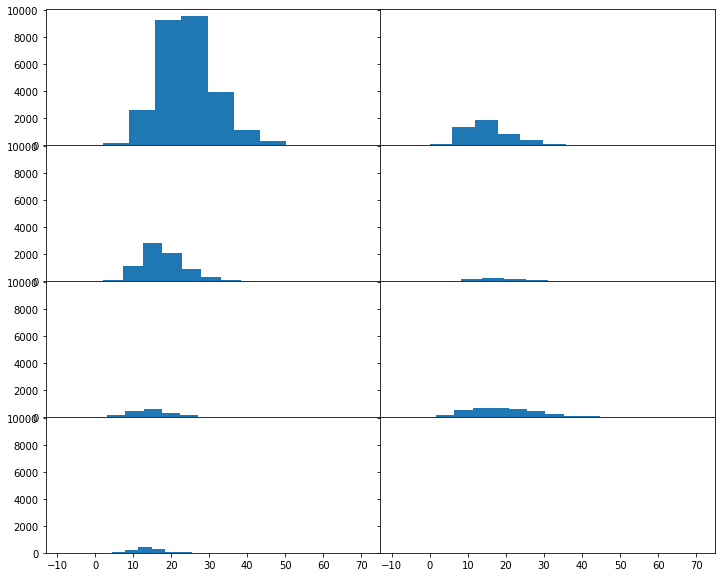

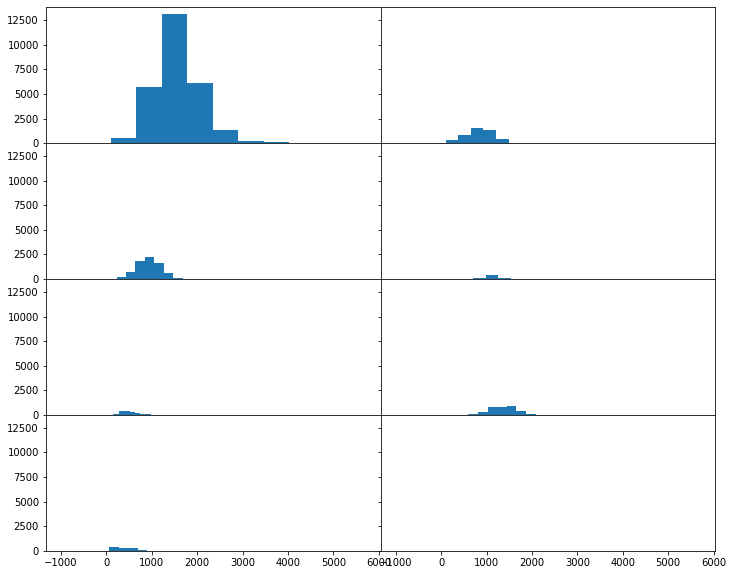

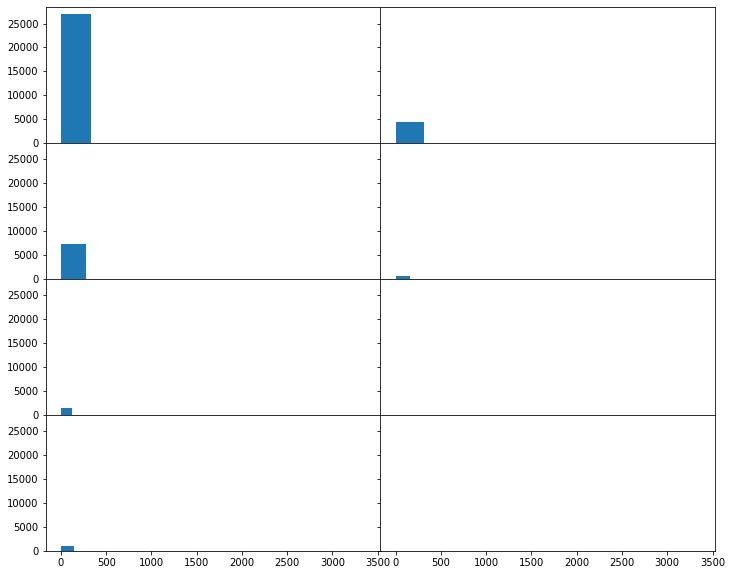

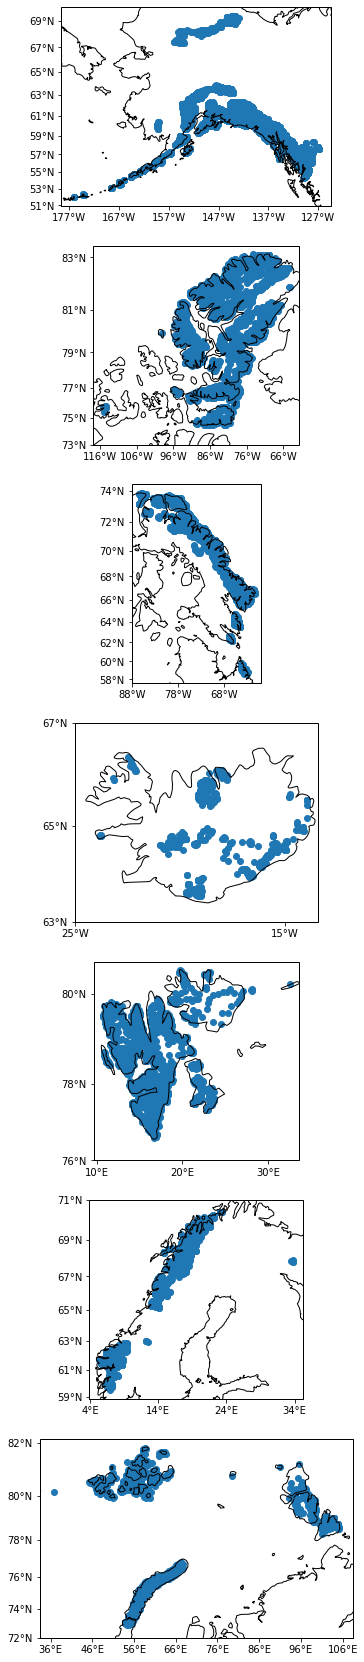

In [3]:
#GLACIER DATA (SHAPE, LOCATION, ETC)
#maybe also include the temp/precip data by subsetting to min/max+1 of furthest glacier 
#need to consider what I will do with svalbard 

#go through initial data exporation where i find out column names and stuff 

#need to assign colors to each region 
lats=[]
longs=[]
slope=[]
min_alt=[]
med_alt=[]
max_alt=[]
#area, and maybe term type? (1=ocean, 0=land, 2=lake; maybe also determine the area/width of glacier terminus)

hyps_fp=sorted(glob.glob(filepath+'/Project_Data/Model_Input_Data/Hypsometry_Data/RGI/00_rgi60_attribs/*.csv'))

land_50m = car.feature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='k',
                                        facecolor='none')

proj_crs = ccrs.PlateCarree()
projection = ccrs.Mercator()


lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig_slope, axs_slope=plt.subplots(4,2,sharex='all', sharey='all', figsize=(12,10))
fig_slope.subplots_adjust(hspace=0,wspace=0)
axs_slope = axs_slope.ravel()

fig_alt, axs_alt=plt.subplots(4,2,sharex='all', sharey='all', figsize=(12,10))
fig_alt.subplots_adjust(hspace=0,wspace=0)
axs_alt = axs_alt.ravel()

fig_area, axs_area=plt.subplots(4,2,sharex='all', sharey='all', figsize=(12,10))
fig_area.subplots_adjust(hspace=0,wspace=0)
axs_area = axs_area.ravel()

fig_loc, axs_loc=plt.subplots(7,1, figsize=(10,30), subplot_kw={'projection': projection})
axs_loc = axs_loc.ravel()


for seq, x in enumerate([1,3,4,6,7,8,9]): 
    reg=pd.read_csv(hyps_fp[x-1], encoding='latin')
    if x == 7: 
        reg=reg.iloc[:1567,:]
        #need to explain this 
    
    east = int(round(reg['CenLon'].min())) - 1
    west = int(round(reg['CenLon'].max())) + 1
    south = int(round(reg['CenLat'].min())) - 1
    north = int(round(reg['CenLat'].max())) + 1

    axs_slope[seq].hist(reg['Slope'])
    axs_alt[seq].hist(reg['Zmed'])
    axs_area[seq].hist(reg['Area'])
    
    axs_loc[seq].add_feature(land_50m)
    axs_loc[seq].scatter(reg['CenLon'],reg['CenLat'], transform=proj_crs)
    axs_loc[seq].set_xticks(np.arange(round(east),round(west)+1,10), crs=ccrs.PlateCarree())
    axs_loc[seq].set_yticks(np.arange(round(south),round(north)+1,2), crs=ccrs.PlateCarree())
    axs_loc[seq].xaxis.set_major_formatter(lon_formatter)
    axs_loc[seq].yaxis.set_major_formatter(lat_formatter)

In [5]:
#have seperate cell for dictionaries section where i can load al the dictionaries, and stuff without loading any data; so i can apply to any cell 

filepath=os.getcwd()
#maybe go through how to extract the data 
era_temp=nc.Dataset(filepath+'/Project_Data/Model_Input_Data/Climate_Data/ERA_Int/ERAInterim_Temp.nc')
era_prec=nc.Dataset(filepath+'/Project_Data/Model_Input_Data/Climate_Data/ERA_Int/ERAInterim_Prec.nc')

In [71]:
era_temp.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     units: degrees_east
     long_name: longitude
 unlimited dimensions: 
 current shape = (720,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (361,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     units: hours since 1900-01-01 00:00:00.0
     long_name: time
     calendar: gregorian
 unlimited dimensions: time
 current shape = (473,)
 filling on, default _FillValue of -2147483647 used,
 't2m': <class 'netCDF4._netCDF4.Variable'>
 int16 t2m(time, latitude, longitude)
     scale_factor: 0.0017505931157179397
     add_offset: 256.96055048469213
     _FillValue: -32767
     missing_value: -32767
     units: K
     long_name: 2 metre temperature

In [72]:
era_prec.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     units: degrees_east
     long_name: longitude
 unlimited dimensions: 
 current shape = (720,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (361,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     units: hours since 1900-01-01 00:00:00.0
     long_name: time
     calendar: gregorian
 unlimited dimensions: time
 current shape = (473,)
 filling on, default _FillValue of -2147483647 used,
 'tp': <class 'netCDF4._netCDF4.Variable'>
 int16 tp(time, latitude, longitude)
     scale_factor: 1.6076236664489408e-06
     add_offset: 0.05267539705486599
     _FillValue: -32767
     missing_value: -32767
     units: m
     long_name: Total precipitation

In [73]:
temp_lat=era_temp['latitude'][:70]
temp_long=era_temp['longitude'][:]
temp_time=era_temp['time'][:]
temp_2m=era_temp['t2m'][:,:70,:]
total_prec=era_prec['tp'][:,:70,:]

In [74]:
print(temp_lat.shape, temp_long.shape, temp_time.shape, temp_2m.shape, total_prec.shape)


(70,) (720,) (473,) (473, 70, 720) (473, 70, 720)


In [31]:
#look at lat/long with ave temp for the duration of time??? (60 yrs; also plot using the circumpolar coords)

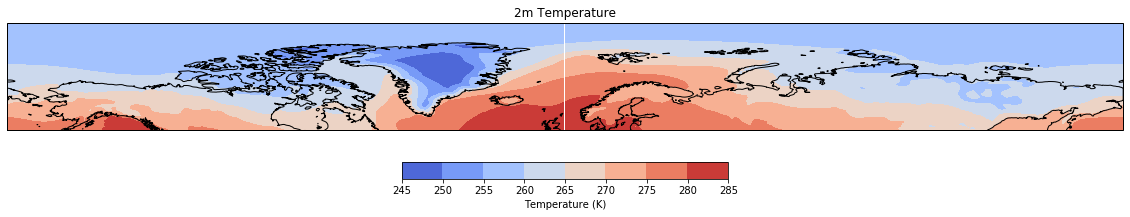

In [68]:
#to do this, will need that projection and basemap 
snap=np.mean(temp_2m, axis=0)
land_50m = car.feature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='k',
                                        facecolor='none')

fig, ax=plt.subplots(figsize=(20,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(land_50m)
cs=ax.contourf(temp_long, temp_lat, snap, cmap='coolwarm')
cb = fig.colorbar(cs, fraction=0.02, pad=0.04, orientation='horizontal')
plt.title('2m Temperature')
cb.set_label('Temperature (K)')

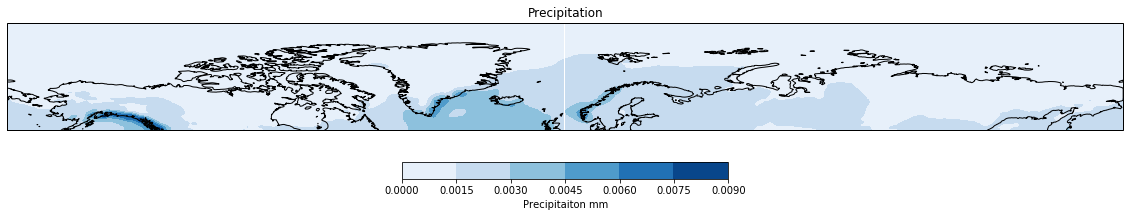

In [77]:
snap=np.mean(total_prec,axis=0))

fig, ax=plt.subplots(figsize=(20,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(land_50m)
cs=ax.contourf(temp_long, temp_lat, snap, cmap='Blues')
cb = fig.colorbar(cs, fraction=0.02, pad=0.04, orientation='horizontal')
plt.title('Precipitation')
cb.set_label('Precipitaiton m')

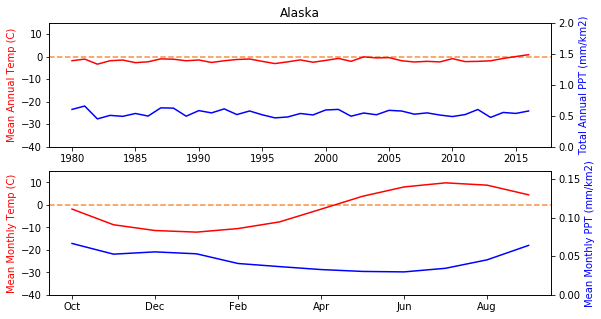

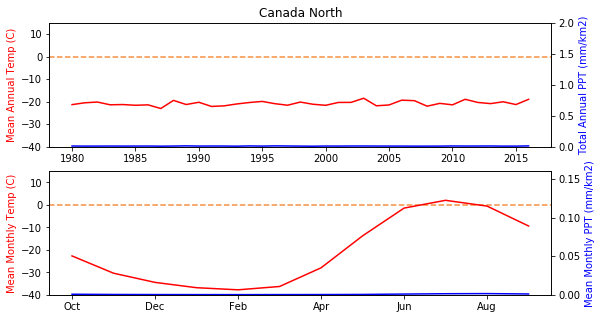

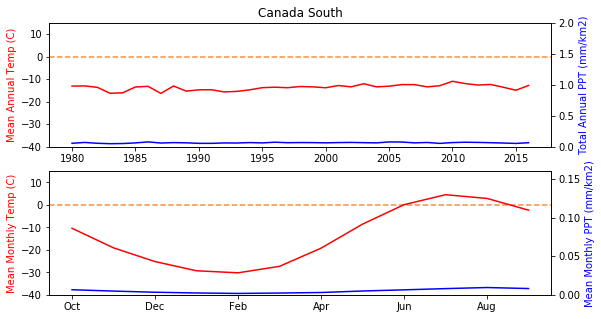

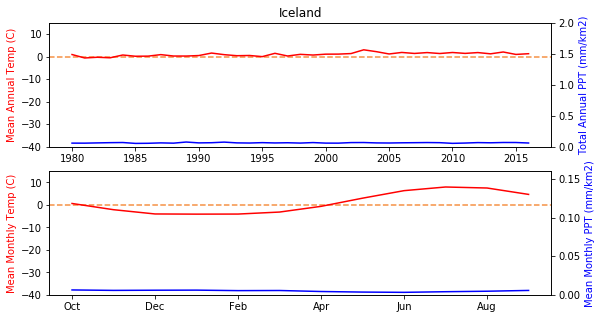

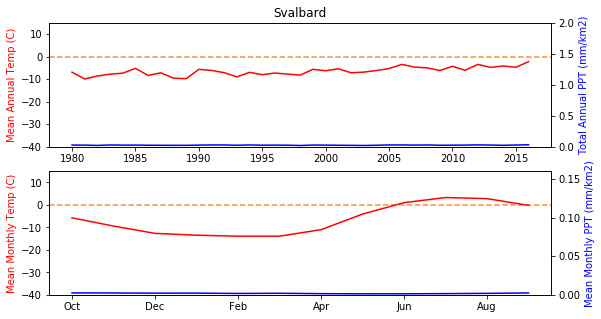

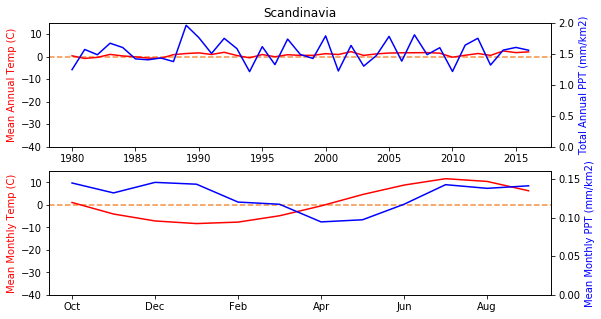

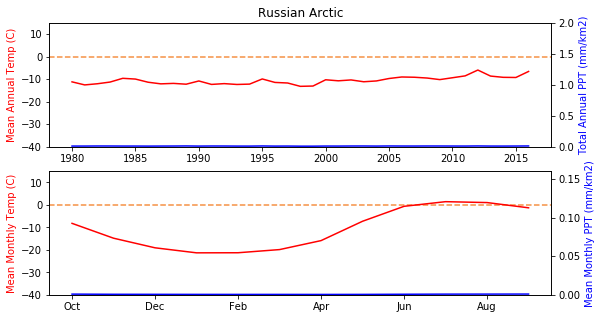

In [108]:
#talk about how the era-int data are subset to only glaceir temp and prec, and then map that and how how i chose what time period to model
year=list(range(1980,2017))
region={1:['Alaska',86725],3:['Canada North',105110],4:['Canada South',40888]
        ,6:['Iceland',11059],7:['Svalbard',33958],8:['Scandinavia',2949], 9:['Russian Arctic',51591]}
temp_all=[]
ppt_all=[]
for x in [1,3,4,6,7,8,9]:

    subset_temp=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Climate_Data/ERAInt_Sim_Selection/RGI_0'+str(x)+'_ERA_Int_Glacier_Temp.csv').iloc[:,1:]
    subset_temp.shape
    subset_ppt=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Climate_Data/ERAInt_Sim_Selection/RGI_0'+str(x)+'_ERA_Int_Glacier_PPT.csv').iloc[:,1:]
    #for every glacier in the region, for 38 yrs 

    subset_annual_temp=np.mean((np.array(np.mean(subset_temp,axis=0)).reshape(-1,12)),axis=1)
    subset_monthmean_temp=np.mean((np.array(np.mean(subset_temp,axis=0)).reshape(-1,12)),axis=0)
    subset_annual_ppt=(np.sum((np.array(np.sum(subset_ppt,axis=0)).reshape(-1,12)),axis=1))/region[x][1]
    subset_monthsum_ppt=(np.mean((np.array(np.sum(subset_ppt,axis=0)).reshape(-1,12)),axis=0))/region[x][1]
    #divide by 1000 to convert to m
    #ppt needs to be weighted by area.... (will need to explain and demonstrate why)
    temp_all.append(subset_annual_temp)
    ppt_all.append(subset_annual_ppt)
    fig, (axs1,axs3)= plt.subplots(2,1, figsize=(9,5))

    axs1.axhline(0,ls='--',c='#f59042')
    axs3.axhline(0,ls='--',c='#f59042')
    axs1.plot(year,subset_annual_temp, c='r')
    axs1.set_title(region[x][0])
    axs1.set_ylabel('Mean Annual Temp (C)', c='r')
    axs2=axs1.twinx()
    axs2.plot(year,subset_annual_ppt, c='b')
    axs2.set_ylabel('Total Annual PPT (mm/km2)',c='b')
    axs3.plot(subset_monthmean_temp, c='r')
    axs4=axs3.twinx()
    axs4.plot(subset_monthsum_ppt,c='b')
    axs3.set_xticks([0,2,4,6,8,10])
    axs3.set_xticklabels(['Oct','Dec','Feb','Apr','Jun','Aug'])
    axs3.set_ylabel('Mean Monthly Temp (C)',c='r')
    axs4.set_ylabel('Mean Monthly PPT (mm/km2)',c='b')
    axs1.set_ylim([-40,15])
    axs3.set_ylim([-40,15])
    axs2.set_ylim([0,2])
    axs4.set_ylim([0,0.16])
    plt.show()

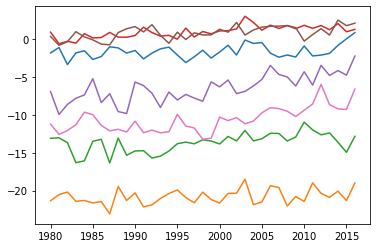

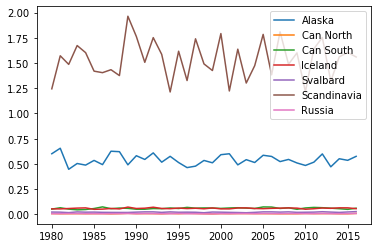

In [113]:
#now lets look at general temperatures for model selection 
#temp_all=np.mean(pd.DataFrame(temp_all),axis=0)
#ppt_all=np.mean(pd.DataFrame(ppt_all),axis=0)

plt.plot(year,pd.DataFrame(temp_all).T)
plt.show()

plt.plot(year,pd.DataFrame(ppt_all).T)
plt.legend(['Alaska', 'Can North','Can South', 'Iceland','Svalbard','Scandinavia','Russia'])
plt.show()

#isnt anything signifiant; since hypsometry data is from 2000, and we are modelling from 2000,
#unless we want to pick a shorter period, starting in 1995-2015 is sufficient 

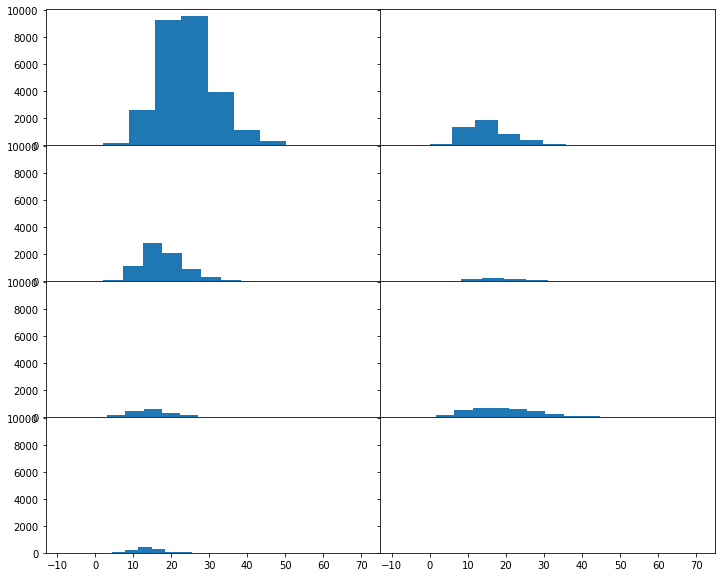

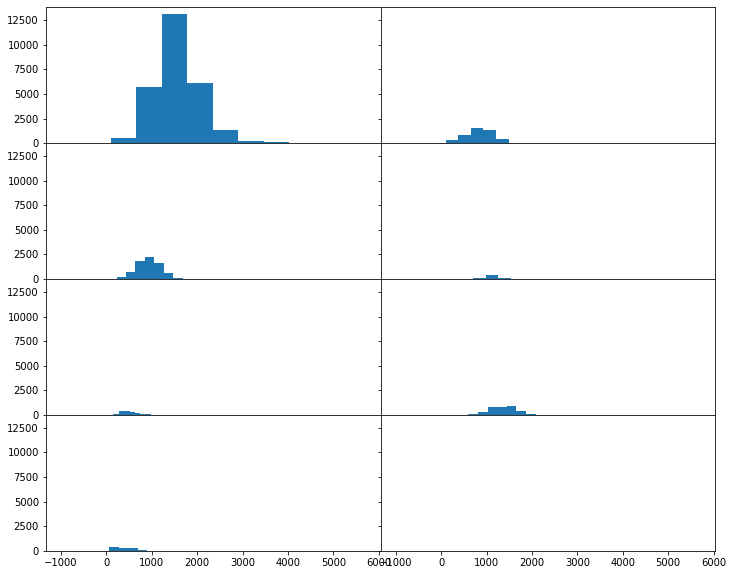

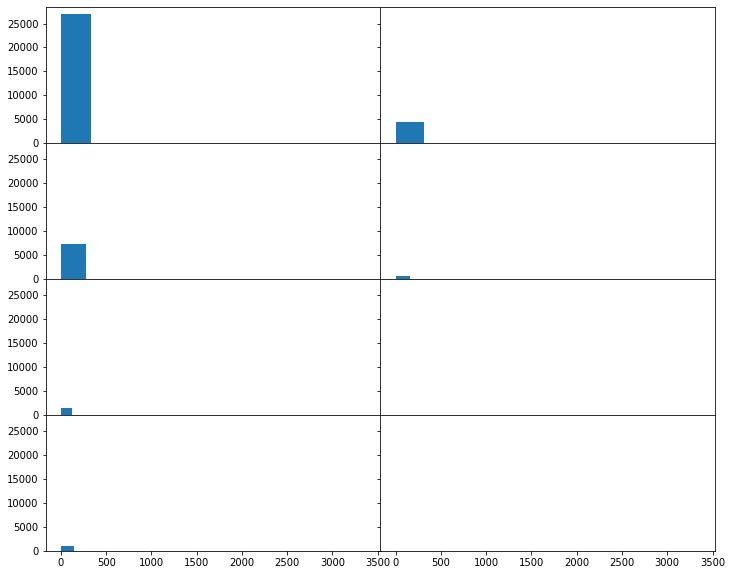

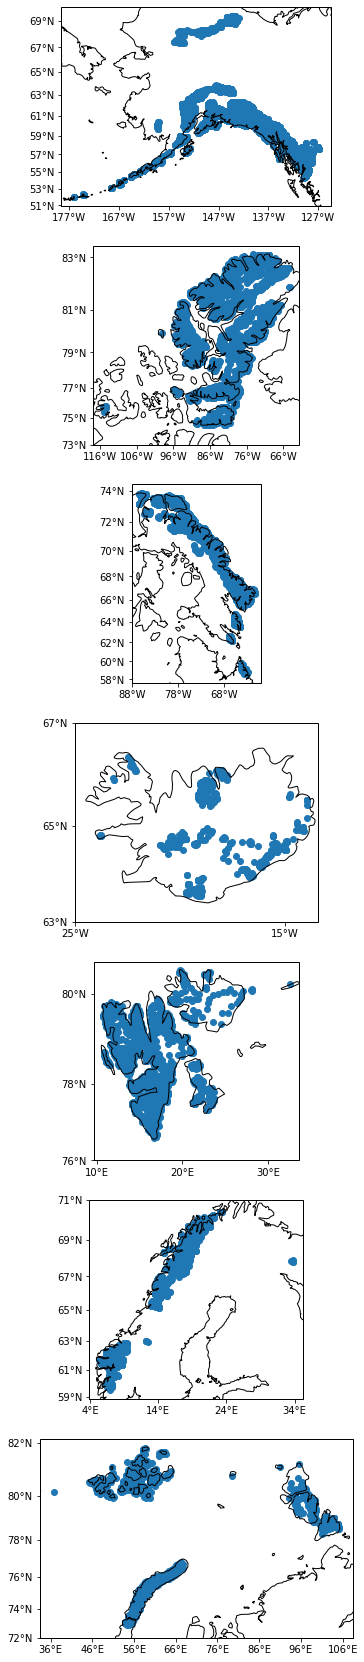

In [ ]:
#mention that at time of my analysis, these data were not compiled all at wgms
#but now that they are can show how one could process such data 

In [16]:
geo_dat=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Glacier_Data/WGMS_2019/WGMS-FoG-2019-12-D-CHANGE.csv', encoding='latin')
glac_dat=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Glacier_Data/WGMS_2019/WGMS-FoG-2019-12-EE-MASS-BALANCE.csv', encoding='latin')


print(geo_dat['POLITICAL_UNIT'].unique())

['AF' 'AQ' 'AR' 'AT' 'BO' 'BT' 'CA' 'CH' 'CL' 'CN' 'CO' 'DE' 'EC' 'ES'
 'FR' 'GE' 'GL' 'HM' 'ID' 'IN' 'IR' 'IS' 'IT' 'KE' 'KG' 'KZ' 'MM' 'MX'
 'NO' 'NP' 'NZ' 'PE' 'PK' 'PL' 'RU' 'SE' 'SI' 'SJ' 'TJ' 'TZ' 'US' 'UZ'
 'VE']


In [17]:
geo_dat=geo_dat.loc[geo_dat['POLITICAL_UNIT'].isin(['CA','IS','NO','RU','SE','SJ','US'])][geo_dat['YEAR']>=1979]
glac_dat=glac_dat.loc[glac_dat['POLITICAL_UNIT'].isin(['CA','IS','NO','RU','SE','SJ','US'])][glac_dat['YEAR']>=1980]
glac_dat=glac_dat[(glac_dat['UPPER_BOUND'] == 9999)&(glac_dat['LOWER_BOUND'] == 9999)]

geo_sub=geo_dat['WGMS_ID'].unique()
glac_sub=glac_dat['WGMS_ID'].unique()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [18]:
#i am interested in wgms_id, glims_id, rgi_id, and lat/long 

id_dict=pd.Series(np.unique(np.concatenate([geo_sub,glac_sub]))).rename('WGMS_ID')

glac_id=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Glacier_Data/WGMS_2019/WGMS-FoG-2019-12-AA-GLACIER-ID-LUT.csv', encoding='latin')
glac_loc=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Glacier_Data/WGMS_2019/WGMS-FoG-2019-12-A-GLACIER.csv', encoding='latin')

id_dict=pd.merge(id_dict, glac_id[['WGMS_ID','GLIMS_ID','RGI_ID']], on='WGMS_ID', how='left')
id_dict=pd.merge(id_dict, glac_loc[['WGMS_ID','LATITUDE','LONGITUDE']], on='WGMS_ID', how='left')

In [19]:
#will create seperate dictionary for v5 v6 or maybe just make a function that deals with both nan and v5/v6
testing06=sorted(glob.glob(filepath+'/Project_Data/Model_Input_Data/Hypsometry_Data/RGI/00_rgi60_attribs/*.csv'))
rgi=pd.DataFrame()
for x in [0,2,3,5,6,7,8]:
    rgi=rgi.append(pd.read_csv(testing06[x], encoding='latin'))
    
rgi60=rgi[['RGIId','GLIMSId','CenLat','CenLon']]
rgi60=rgi60.reset_index(drop=True)
counts=0
for x in range(len(id_dict)):
    if pd.isnull(id_dict['RGI_ID'][x]) or id_dict['RGI_ID'][x].split('-')[0]=='RGI50':
#        id_dict['RGI_ID'][x]=np.nan
        try: 
            id_dict['RGI_ID'][x]=rgi60['RGIId'][rgi60['GLIMSId']==id_dict['GLIMS_ID'][x]].values[0]
            counts+=1
        except:
            try: 
                latlon_diff=pd.Series(abs(np.diff(rgi60[['CenLat','CenLon']], axis=1)-np.diff(id_dict.iloc[x][['LATITUDE','LONGITUDE']]))[:,0]).astype(float)
                latlon_sums=abs(np.sum(abs(rgi60[['CenLat','CenLon']]), axis=1)-np.sum(abs(id_dict.iloc[x][['LATITUDE','LONGITUDE']])))
                latlon_analysis=latlon_diff+latlon_sums
                diff=rgi60[latlon_analysis<=0.004]
                if len(diff)!=0:
                    diff['val']=latlon_diff[latlon_diff<=0.004]
                    diff=diff[diff['val']==min(diff['val'])]
                # if ((diff['LATITUDE']+1 > id_dict['CenLat'][x] > diff['LATITUDE']- 1) 
                #     & (diff['LONGITUDE']+1 > id_dict['CenLon'][x] > diff['LONGITUDE']- 1)):
                    id_dict['RGI_ID'][x]=diff['RGIId'].values[0]
                    counts+=1
                else: 
                    id_dict['RGI_ID'][x]=np.nan
            except :
                id_dict['RGI_ID'][x]=np.nan

id_dict=id_dict.dropna(subset=['RGI_ID'])
id_dict['REGION_NO']=id_dict['RGI_ID'].apply(lambda x: int(x.split('-')[1].split('.')[0]))
id_dict['GLAC_NO']=id_dict['RGI_ID'].apply(lambda x: int(x.split('-')[1].split('.')[1]))

#remove irrelevant regions 


id_dict=id_dict[id_dict['REGION_NO'].apply(lambda x: x in [1,3,4,6,7,8,9])]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/

In [20]:
geo_change=pd.merge(geo_dat[['WGMS_ID','THICKNESS_CHG','THICKNESS_CHG_UNC','YEAR','SURVEY_DATE','REFERENCE_DATE']],id_dict[['WGMS_ID','RGI_ID','REGION_NO','GLAC_NO']], on='WGMS_ID',how='inner')
glac_change=pd.merge(glac_dat[['WGMS_ID','YEAR','SUMMER_BALANCE','SUMMER_BALANCE_UNC','WINTER_BALANCE', 'WINTER_BALANCE_UNC',
                               'ANNUAL_BALANCE','ANNUAL_BALANCE_UNC','LOWER_BOUND','UPPER_BOUND']],
                     id_dict[['WGMS_ID','RGI_ID','REGION_NO','GLAC_NO']], on='WGMS_ID',how='inner')



surv_month=geo_change['SURVEY_DATE'].dropna().apply(lambda x: int(str(int(x))[4:6])) 
surv_month=surv_month[surv_month <=12][surv_month >=10].index

geo_change['YEAR'][surv_month]+=1

#all this preprocessing needs to be put into a seperate file that builds this function 


#convert to yearly measurements for visualization purposes 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [9]:
#make terminus type plots and something maybe additional hist for max and min altitude in each reigon 

#all data now available from wgms; will need to extract and work with the datasets available 
# make charts like in ch 1 of data coverage, area coverage, what massbal says, etc
#then replot maps with mass bal 

In [3]:
#%% STEP 1: identify glaciers that need to be connected to the rgi 

#need to extract all glaciers from glaciological and geodetic that need ids
#need only to extract the unique ids and join the lists, while removing duplicates 


original=pd.read_csv(filepath+'/McNabb_Private/Alaska_dV_17jun.csv')


testing2=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Glacier_Data/WGMS_2019/WGMS-FoG-2019-12-A-GLACIER.csv', encoding='latin')[['WGMS_ID','GLACIER_REGION_CODE']]
testing2=testing2.loc[testing2['GLACIER_REGION_CODE'].isin(['SJM','RUA','SCA','ISL','ALA','ACN','ACS'])]



#maybe have a seperate seciton where i build and explain the funciton 


geo_dat=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Glacier_Data/WGMS_2019/WGMS-FoG-2019-12-D-CHANGE.csv', encoding='latin')
glac_dat=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Glacier_Data/WGMS_2019/WGMS-FoG-2019-12-EE-MASS-BALANCE.csv', encoding='latin')



#geo_dat=geo_dat.loc[geo_dat['POLITICAL_UNIT'].isin(['CA','IS','NO','RU','SE','SJ','US'])][geo_dat['YEAR']>=1959]
#glac_dat=glac_dat.loc[glac_dat['POLITICAL_UNIT'].isin(['CA','IS','NO','RU','SE','SJ','US'])][glac_dat['YEAR']>=1960]
glac_dat=glac_dat[(glac_dat['UPPER_BOUND'] == 9999)&(glac_dat['LOWER_BOUND'] == 9999)]

geo_sub=geo_dat['WGMS_ID'].unique()
glac_sub=glac_dat['WGMS_ID'].unique()


#i am interested in wgms_id, glims_id, rgi_id, and lat/long 

id_dict=pd.Series(np.unique(np.concatenate([geo_sub,glac_sub]))).rename('WGMS_ID')

glac_id=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Glacier_Data/WGMS_2019/WGMS-FoG-2019-12-AA-GLACIER-ID-LUT.csv', encoding='latin')

glac_loc=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Glacier_Data/WGMS_2019/WGMS-FoG-2019-12-A-GLACIER.csv', encoding='latin')


id_dict=pd.merge(id_dict, glac_id[['WGMS_ID','GLIMS_ID','RGI_ID']], on='WGMS_ID', how='left')
id_dict=pd.merge(id_dict, glac_loc[['WGMS_ID','LATITUDE','LONGITUDE']], on='WGMS_ID', how='left')

#deal with first problem, which is the rgi v 5; can't just convert to v 6, because it won't be the same 
#start with glims/wgms/latlong 

#will create seperate dictionary for v5 v6 or maybe just make a function that deals with both nan and v5/v6
testing06=sorted(glob.glob(filepath+'/Project_Data/Model_Input_Data/Hypsometry_Data/RGI/00_rgi60_attribs/*.csv'))
rgi=pd.DataFrame()
for x in [0,2,3,5,6,7,8]:
    rgi=rgi.append(pd.read_csv(testing06[x], encoding='latin'))
    
rgi60=rgi[['RGIId','GLIMSId','CenLat','CenLon']]
rgi60=rgi60.reset_index(drop=True)
counts=0
for x in range(len(id_dict)):
    if pd.isnull(id_dict['RGI_ID'][x]) or id_dict['RGI_ID'][x].split('-')[0]=='RGI50':
#        id_dict['RGI_ID'][x]=np.nan
        try: 
            id_dict['RGI_ID'][x]=rgi60['RGIId'][rgi60['GLIMSId']==id_dict['GLIMS_ID'][x]].values[0]
            counts+=1
        except:
            try: 
                latlon_diff=pd.Series(abs(np.diff(rgi60[['CenLat','CenLon']], axis=1)-np.diff(id_dict.iloc[x][['LATITUDE','LONGITUDE']]))[:,0]).astype(float)
                latlon_sums=abs(np.sum(abs(rgi60[['CenLat','CenLon']]), axis=1)-np.sum(abs(id_dict.iloc[x][['LATITUDE','LONGITUDE']])))
                latlon_analysis=latlon_diff+latlon_sums
                diff=rgi60[latlon_analysis<=0.004]
                if len(diff)!=0:
                    diff['val']=latlon_diff[latlon_diff<=0.004]
                    diff=diff[diff['val']==min(diff['val'])]
                # if ((diff['LATITUDE']+1 > id_dict['CenLat'][x] > diff['LATITUDE']- 1) 
                #     & (diff['LONGITUDE']+1 > id_dict['CenLon'][x] > diff['LONGITUDE']- 1)):
                    id_dict['RGI_ID'][x]=diff['RGIId'].values[0]
                    counts+=1
                else: 
                    id_dict['RGI_ID'][x]=np.nan
            except :
                id_dict['RGI_ID'][x]=np.nan

id_dict=id_dict.dropna(subset=['RGI_ID'])
id_dict['REGION_NO']=id_dict['RGI_ID'].apply(lambda x: int(x.split('-')[1].split('.')[0]))
id_dict['GLAC_NO']=id_dict['RGI_ID'].apply(lambda x: int(x.split('-')[1].split('.')[1]))

#remove irrelevant regions 


id_dict=id_dict[id_dict['REGION_NO'].apply(lambda x: x in [1,3,4,6,7,8,9])]

geo_change=pd.merge(geo_dat[['WGMS_ID','THICKNESS_CHG','THICKNESS_CHG_UNC','VOLUME_CHANGE',
                             'VOLUME_CHANGE_UNC','YEAR','SURVEY_DATE','REFERENCE_DATE']],id_dict[['WGMS_ID','RGI_ID','REGION_NO','GLAC_NO']], on='WGMS_ID',how='inner')
glac_change=pd.merge(glac_dat[['WGMS_ID','YEAR','SUMMER_BALANCE','SUMMER_BALANCE_UNC','WINTER_BALANCE', 'WINTER_BALANCE_UNC',
                               'ANNUAL_BALANCE','ANNUAL_BALANCE_UNC','LOWER_BOUND','UPPER_BOUND']],
                     id_dict[['WGMS_ID','RGI_ID','REGION_NO','GLAC_NO']], on='WGMS_ID',how='inner')


#convert to yearly measurements for visualization purposes 


surv_month=geo_change['SURVEY_DATE'].dropna().apply(lambda x: int(str(int(x))[4:6])) 
surv_month=surv_month[surv_month <=12][surv_month >=10].index

geo_change['YEAR'][surv_month]+=1

geo_change['REF_YEAR']=geo_change['REFERENCE_DATE'].dropna().apply(lambda x: int(str(int(x))[:4])) 

surv_month=geo_change['REFERENCE_DATE'].dropna().apply(lambda x: int(str(int(x))[4:6])) 
surv_month=surv_month[surv_month <=12][surv_month >=10].index
geo_change['REF_YEAR'][surv_month]+=1

#for glac and geo: use group by functions, and area-weight them first 

#maybe do fraction on all glaciers first per region 

#use 'rgi' and load area file, join, make fraction and just join by that fraction 

#will need to combine thickness and volume change 


#WILL JUST HAVE TO SAY THAT DATA ARE SIMILAR; THIS IS JUST A REPRESENTATION OF WHAT THE DATA LOOK LIKE 

rgi_stat=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Hypsometry_Data/RGI/00_rgi60_summary.csv', skiprows=[0]).iloc[:21,:]

rgi_stat.columns=rgi_stat.columns.map(lambda x: x.strip())
rgi_stat=rgi_stat.dropna(subset=['O1'])
rgi_stat[['O1','Count','Area']]=rgi_stat[['O1','Count','Area']].astype(int)
rgi_stat.rename(columns={'Area':'Total_Area','O1':'O1Region'}, inplace=True)

rgi=pd.merge(rgi, rgi_stat[['O1Region','Count','Total_Area']], on='O1Region', how='left')

#rgi['area_weight']=rgi['Area']/rgi['Total_Area']

geo_change['THICKNESS_CHG']=(geo_change['THICKNESS_CHG']/1000)*0.9

geo_change=pd.merge(geo_change,rgi[['RGIId','Area']], left_on='RGI_ID',right_on='RGIId',how='left')

geo_change=geo_change.dropna(subset=['REF_YEAR'])

geo_change_mass=geo_change[['RGI_ID','REF_YEAR','YEAR','THICKNESS_CHG','Area']].rename(columns={'THICKNESS_CHG':'MASSBAL'}).dropna(subset=['MASSBAL'])
# geo_change['VOLUME_CHANGE']=(geo_change['VOLUME_CHANGE']*0.9)/(geo_change['Area']*1000) #area in km, need to change to m for volume

# geo_change_mass=pd.concat([geo_change[['RGI_ID','REF_YEAR','YEAR','THICKNESS_CHG','Area']].rename(columns={'THICKNESS_CHG':'MASSBAL'}).dropna(subset=['MASSBAL']),
#                            geo_change[['RGI_ID','REF_YEAR','YEAR','VOLUME_CHANGE','Area']].rename(columns={'VOLUME_CHANGE':'MASSBAL'}).dropna(subset=['MASSBAL'])], 
#                           ignore_index=True)

glac_change['ANNUAL_BALANCE']=glac_change['ANNUAL_BALANCE']/1000

glac_change=glac_change.dropna(subset=['ANNUAL_BALANCE'])
glac_change=pd.merge(glac_change,rgi[['RGIId','Area']], left_on='RGI_ID',right_on='RGIId',how='left')

review_RGI=pd.DataFrame(pd.concat([geo_change_mass['RGI_ID'],glac_change['RGI_ID']]).unique()).rename(columns={0:'RGI_ID'})

review_RGI['REGION_NO']=review_RGI['RGI_ID'].apply(lambda x: int(x.split('-')[1].split('.')[0]))        
                      
    
geo_final=[]
glac_final=[]
full_final=[]                      


for reg in [1,3,4,6,7,8,9]: 
    

    geo_array=[]
    glac_array=[]
    full_array=[]                      

    
    #this will have to be done PER REGION
    
    REG_RGI=review_RGI[review_RGI['REGION_NO']==reg]
    
    for count, x in enumerate(REG_RGI['RGI_ID'] ,1): 
        print(x)
        # if round((count/len(review_RGI))*100) %5 ==0: 
        #     print((count/len(review_RGI))*100,' % done')
        temp_array=[]
        geo_temp_array=[]
        glac_temp_array=[]
        if x in geo_change_mass['RGI_ID'].values: 
            temp_full=geo_change_mass[geo_change_mass['RGI_ID']==x]
            for y in range(len(temp_full)): 
                temp_y=temp_full.iloc[y]
                ranges=list(range(int(temp_y['REF_YEAR']),temp_y['YEAR']))
                temp=np.array([ranges, np.full(len(ranges), temp_y['MASSBAL']/len(ranges)),
                               np.full(len(ranges), temp_y['Area'])]).transpose()
                temp_array.append(temp)
                geo_temp_array.append(temp)
            
            geo_array.append(np.array(pd.DataFrame(np.concatenate(geo_temp_array,axis=0))
                                      .groupby(by=0, as_index=False).mean()))
                 
    
        if x in glac_change['RGI_ID'].values: 
            temp=np.array(glac_change[glac_change['RGI_ID']==x][['YEAR','ANNUAL_BALANCE','Area']])
            glac_array.append(temp)
            temp_array.append(temp)
            
         
        test2=pd.DataFrame(np.concatenate(temp_array,axis=0)).groupby(by=0, as_index=False).mean()
        #test2['RGI_ID']=[x]*len(test2)
        full_array.append(np.array(test2))
        
            
    #will need to make this into a little function of its own        
    full_array=pd.DataFrame(np.concatenate(full_array,axis=0))
    full_array_sum=full_array.groupby(by=0,as_index=False).sum()[[0,2]]
    full_array=pd.merge(full_array,full_array_sum, on=0,how='left')
    full_array.columns=['Year','MassBal','Glac_Area','Total_Area']
    full_array['area_weight']=full_array['Glac_Area']/full_array['Total_Area']
    full_array['MassBal_AW']=full_array['MassBal']*full_array['area_weight']
    
    
    full_array=full_array.groupby(by='Year',as_index=False).sum()[['Year','Glac_Area','area_weight','MassBal_AW']]
    full_array['REGION_NO']=[reg]*len(full_array)
    full_final.append(full_array)

    if len(geo_array) >0:

        geo_array=pd.DataFrame(np.concatenate(geo_array,axis=0))
        geo_array_sum=geo_array.groupby(by=0,as_index=False).sum()[[0,2]]
        geo_array=pd.merge(geo_array,geo_array_sum, on=0,how='left')
        geo_array.columns=['Year','MassBal','Glac_Area','Total_Area']
        geo_array['area_weight']=geo_array['Glac_Area']/geo_array['Total_Area']
        geo_array['MassBal_AW']=geo_array['MassBal']*geo_array['area_weight']
        
        geo_array=geo_array.groupby(by='Year',as_index=False).sum()[['Year','Glac_Area','area_weight','MassBal_AW']]
        geo_array['REGION_NO']=[reg]*len(geo_array)
        geo_final.append(geo_array)

    if len(glac_array) >0: 
        glac_array=pd.DataFrame(np.concatenate(glac_array,axis=0))
        glac_array_sum=glac_array.groupby(by=0,as_index=False).sum()[[0,2]]
        glac_array=pd.merge(glac_array,glac_array_sum, on=0,how='left')
        glac_array.columns=['Year','MassBal','Glac_Area','Total_Area']
        glac_array['area_weight']=glac_array['Glac_Area']/glac_array['Total_Area']
        glac_array['MassBal_AW']=glac_array['MassBal']*glac_array['area_weight']
        
        glac_array=glac_array.groupby(by='Year',as_index=False).sum()[['Year','Glac_Area','area_weight','MassBal_AW']]
        glac_array['REGION_NO']=[reg]*len(glac_array)
        glac_final.append(glac_array)

#test_final=test_final[test_final['Year']>=1980]


full_final=pd.DataFrame(np.concatenate(full_final, axis=0))
geo_final=pd.DataFrame(np.concatenate(geo_final, axis=0))
glac_final=pd.DataFrame(np.concatenate(glac_final, axis=0))


full_final.columns=['Year','Area','AW_SUM','Spec_Massbal','REGION_NO']
geo_final.columns=['Year','Area','AW_SUM','Spec_Massbal','REGION_NO']
glac_final.columns=['Year','Area','AW_SUM','Spec_Massbal','REGION_NO']

#need area percentage here as well.... 

#THIS MORE OR LESS FULLY NEEDS TO BE IN A FUNCTION

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/

RGI60-01.04516
RGI60-01.21014
RGI60-01.16342
RGI60-01.20937
RGI60-01.25453
RGI60-01.16545
RGI60-01.11421
RGI60-01.03360
RGI60-01.11477
RGI60-01.02467
RGI60-01.13879
RGI60-01.11512
RGI60-01.01304
RGI60-01.25840
RGI60-01.13838
RGI60-01.01306
RGI60-01.01513
RGI60-01.16112
RGI60-01.10044
RGI60-01.13470
RGI60-01.24896
RGI60-01.02245
RGI60-01.03470
RGI60-01.17626
RGI60-01.10371
RGI60-01.08633
RGI60-01.01519
RGI60-01.17067
RGI60-01.08992
RGI60-01.08731
RGI60-01.08638
RGI60-01.15329
RGI60-01.17123
RGI60-01.24104
RGI60-01.09791
RGI60-01.26689
RGI60-01.11657
RGI60-01.02238
RGI60-01.19702
RGI60-01.10029
RGI60-01.22909
RGI60-01.01921
RGI60-01.17899
RGI60-01.02315
RGI60-01.24135
RGI60-01.09440
RGI60-01.08917
RGI60-01.00408
RGI60-01.23022
RGI60-01.02234
RGI60-01.25514
RGI60-01.01837
RGI60-01.08553
RGI60-01.19343
RGI60-01.17876
RGI60-01.02206
RGI60-01.18016
RGI60-01.09205
RGI60-01.17907
RGI60-01.02170
RGI60-01.24140
RGI60-01.10098
RGI60-01.22590
RGI60-01.08171
RGI60-01.09107
RGI60-01.02230
RGI60-01.1

RGI60-01.12433
RGI60-01.01918
RGI60-01.12422
RGI60-01.19570
RGI60-01.12429
RGI60-01.09292
RGI60-01.26696
RGI60-01.19926
RGI60-01.12414
RGI60-01.12501
RGI60-01.01940
RGI60-01.12622
RGI60-01.19241
RGI60-01.19947
RGI60-01.19218
RGI60-01.12260
RGI60-01.11226
RGI60-01.18815
RGI60-01.12169
RGI60-01.08228
RGI60-01.01900
RGI60-01.24315
RGI60-01.08320
RGI60-01.18859
RGI60-01.08272
RGI60-01.19960
RGI60-01.12024
RGI60-01.25063
RGI60-01.19263
RGI60-01.22025
RGI60-01.19478
RGI60-01.18919
RGI60-01.18962
RGI60-01.18842
RGI60-01.18880
RGI60-01.18415
RGI60-01.12493
RGI60-01.01582
RGI60-01.18930
RGI60-01.11986
RGI60-01.01901
RGI60-01.18732
RGI60-01.18734
RGI60-01.18952
RGI60-01.22157
RGI60-01.22117
RGI60-01.18849
RGI60-01.10944
RGI60-01.18772
RGI60-01.18902
RGI60-01.22358
RGI60-01.22146
RGI60-01.19016
RGI60-01.19816
RGI60-01.20157
RGI60-01.22217
RGI60-01.22373
RGI60-01.01806
RGI60-01.22389
RGI60-01.18558
RGI60-01.19080
RGI60-01.12348
RGI60-01.18878
RGI60-01.19049
RGI60-01.18778
RGI60-01.08213
RGI60-01.1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:183: RuntimeWarning: divide by zero encountered in double_scalars



RGI60-03.01067
RGI60-03.00950
RGI60-03.01082
RGI60-03.00916
RGI60-03.04515
RGI60-03.04058
RGI60-03.00915
RGI60-03.00997
RGI60-03.04151
RGI60-03.03357
RGI60-03.00961
RGI60-04.07381
RGI60-04.01286
RGI60-04.07380
RGI60-04.07329
RGI60-04.05365
RGI60-04.01150
RGI60-04.07363
RGI60-04.07362
RGI60-04.07360
RGI60-04.06791
RGI60-04.06749
RGI60-04.03308
RGI60-04.05688
RGI60-04.07182
RGI60-04.03836
RGI60-04.05149
RGI60-04.06544
RGI60-04.06840
RGI60-06.00393
RGI60-06.00524
RGI60-06.00483
RGI60-06.00407
RGI60-06.00305
RGI60-06.00297
RGI60-06.00043
RGI60-06.00107
RGI60-06.00306
RGI60-06.00236

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:183: RuntimeWarning: invalid value encountered in double_scalars



RGI60-06.00115
RGI60-06.00074
RGI60-06.00425
RGI60-06.00476
RGI60-06.00301
RGI60-06.00261
RGI60-06.00237
RGI60-06.00090
RGI60-06.00294
RGI60-06.00479
RGI60-06.00304
RGI60-06.00094
RGI60-06.00028
RGI60-06.00568
RGI60-06.00474
RGI60-06.00513
RGI60-06.00001
RGI60-06.00002
RGI60-06.00003
RGI60-06.00005
RGI60-06.00006
RGI60-06.00007
RGI60-06.00008
RGI60-06.00009
RGI60-06.00010
RGI60-06.00013
RGI60-06.00014
RGI60-06.00015
RGI60-06.00017
RGI60-06.00025
RGI60-06.00026
RGI60-06.00027
RGI60-06.00029
RGI60-06.00036
RGI60-06.00041
RGI60-06.00044
RGI60-06.00046
RGI60-06.00048
RGI60-06.00049
RGI60-06.00052
RGI60-06.00055
RGI60-06.00057
RGI60-06.00058
RGI60-06.00061
RGI60-06.00066
RGI60-06.00067
RGI60-06.00069
RGI60-06.00071
RGI60-06.00072
RGI60-06.00078
RGI60-06.00079
RGI60-06.00081
RGI60-06.00085
RGI60-06.00087
RGI60-06.00089
RGI60-06.00096
RGI60-06.00098
RGI60-06.00100
RGI60-06.00102
RGI60-06.00104
RGI60-06.00105
RGI60-06.00106
RGI60-06.00109
RGI60-06.00112
RGI60-06.00113
RGI60-06.00121
RGI60-06.

RGI60-07.00405
RGI60-07.00407
RGI60-07.00409
RGI60-07.00410
RGI60-07.00411
RGI60-07.00413
RGI60-07.00414
RGI60-07.00416
RGI60-07.00417
RGI60-07.00418
RGI60-07.00419
RGI60-07.00420
RGI60-07.00421
RGI60-07.00430
RGI60-07.00431
RGI60-07.00432
RGI60-07.00433
RGI60-07.00435
RGI60-07.00437
RGI60-07.00438
RGI60-07.00439
RGI60-07.00440
RGI60-07.00441
RGI60-07.00442
RGI60-07.00443
RGI60-07.00444
RGI60-07.00446
RGI60-07.00447
RGI60-07.00448
RGI60-07.00449
RGI60-07.00453
RGI60-07.00454
RGI60-07.00455
RGI60-07.00456
RGI60-07.00457
RGI60-07.00458
RGI60-07.00459
RGI60-07.00462
RGI60-07.00463
RGI60-07.00465
RGI60-07.00466
RGI60-07.00467
RGI60-07.00468
RGI60-07.00469
RGI60-07.00470
RGI60-07.00471
RGI60-07.00472
RGI60-07.00473
RGI60-07.00475
RGI60-07.00480
RGI60-07.00481
RGI60-07.00482
RGI60-07.00483
RGI60-07.00487
RGI60-07.00488
RGI60-07.00489
RGI60-07.00491
RGI60-07.00495
RGI60-07.00497
RGI60-07.00498
RGI60-07.00499
RGI60-07.00500
RGI60-07.00501
RGI60-07.00503
RGI60-07.00505
RGI60-07.00506
RGI60-07.0

RGI60-07.01218
RGI60-07.01219
RGI60-07.01220
RGI60-07.01221
RGI60-07.01222
RGI60-07.01224
RGI60-07.01225
RGI60-07.01226
RGI60-07.01227
RGI60-07.01228
RGI60-07.01229
RGI60-07.01232
RGI60-07.01233
RGI60-07.01234
RGI60-07.01236
RGI60-07.01237
RGI60-07.01238
RGI60-07.01239
RGI60-07.01240
RGI60-07.01241
RGI60-07.01244
RGI60-07.01245
RGI60-07.01251
RGI60-07.01252
RGI60-07.01253
RGI60-07.01254
RGI60-07.01257
RGI60-07.01258
RGI60-07.01260
RGI60-07.01263
RGI60-07.01265
RGI60-07.01266
RGI60-07.01267
RGI60-07.01268
RGI60-07.01269
RGI60-07.01270
RGI60-07.01271
RGI60-07.01272
RGI60-07.01273
RGI60-07.01275
RGI60-07.01279
RGI60-07.01280
RGI60-07.01281
RGI60-07.01282
RGI60-07.01283
RGI60-07.01289
RGI60-07.01291
RGI60-07.01292
RGI60-07.01293
RGI60-07.01294
RGI60-07.01296
RGI60-07.01297
RGI60-07.01299
RGI60-07.01300
RGI60-07.01302
RGI60-07.01306
RGI60-07.01309
RGI60-07.01310
RGI60-07.01314
RGI60-07.01316
RGI60-07.01317
RGI60-07.01321
RGI60-07.01324
RGI60-07.01326
RGI60-07.01327
RGI60-07.01328
RGI60-07.0

RGI60-08.00485
RGI60-08.00492
RGI60-08.00496
RGI60-08.00497
RGI60-08.00499
RGI60-08.00507
RGI60-08.00514
RGI60-08.00515
RGI60-08.00521
RGI60-08.00522
RGI60-08.00533
RGI60-08.00535
RGI60-08.00538
RGI60-08.00540
RGI60-08.00542
RGI60-08.00549
RGI60-08.00551
RGI60-08.00552
RGI60-08.00554
RGI60-08.00560
RGI60-08.00568
RGI60-08.00582
RGI60-08.00584
RGI60-08.00611
RGI60-08.00613
RGI60-08.00630
RGI60-08.00639
RGI60-08.00640
RGI60-08.00649
RGI60-08.00651
RGI60-08.00658
RGI60-08.00709
RGI60-08.00716
RGI60-08.00718
RGI60-08.00733
RGI60-08.00742
RGI60-08.00743
RGI60-08.00747
RGI60-08.00752
RGI60-08.00753
RGI60-08.00755
RGI60-08.00756
RGI60-08.00757
RGI60-08.00761
RGI60-08.00762
RGI60-08.00765
RGI60-08.00767
RGI60-08.00771
RGI60-08.00772
RGI60-08.00778
RGI60-08.00779
RGI60-08.00790
RGI60-08.00797
RGI60-08.00808
RGI60-08.00811
RGI60-08.00812
RGI60-08.00814
RGI60-08.00816
RGI60-08.00827
RGI60-08.00831
RGI60-08.00845
RGI60-08.00854
RGI60-08.00869
RGI60-08.00877
RGI60-08.00878
RGI60-08.00896
RGI60-08.0

RGI60-08.01767
RGI60-08.01768
RGI60-08.01163
RGI60-08.01453
RGI60-08.01012
RGI60-08.01011
RGI60-08.02155
RGI60-08.00502
RGI60-08.01186
RGI60-08.00861
RGI60-08.00335
RGI60-08.01781
RGI60-08.01226
RGI60-08.02256
RGI60-08.02235
RGI60-08.00333
RGI60-08.01100
RGI60-08.01093
RGI60-08.01139
RGI60-08.02866
RGI60-08.00973
RGI60-08.00997
RGI60-08.00781
RGI60-08.00819
RGI60-08.00818
RGI60-08.00134
RGI60-08.00109
RGI60-08.00157
RGI60-08.00147
RGI60-08.00184
RGI60-08.00013
RGI60-08.00128
RGI60-08.00227
RGI60-08.00008
RGI60-08.00136
RGI60-08.00229
RGI60-08.00009
RGI60-08.00072
RGI60-08.00265
RGI60-08.00057
RGI60-08.00251
RGI60-08.00017
RGI60-08.00259
RGI60-08.00249
RGI60-08.00202
RGI60-08.00171
RGI60-08.00245
RGI60-08.00019
RGI60-08.00161
RGI60-08.00155
RGI60-08.00199
RGI60-08.00270
RGI60-08.00121
RGI60-08.00191
RGI60-08.00122
RGI60-08.00233
RGI60-08.00194
RGI60-08.00267
RGI60-08.00107
RGI60-08.00042
RGI60-08.00096
RGI60-08.00037
RGI60-08.00137
RGI60-08.00132
RGI60-08.00146
RGI60-08.00053
RGI60-08.0

1 3.6530239858450715
3 0.3480373293388696
4 0.05270278127457238
6 12.352335068903157
7 8.152300441404496
8 18.998242536920777
9 5.457366623188271


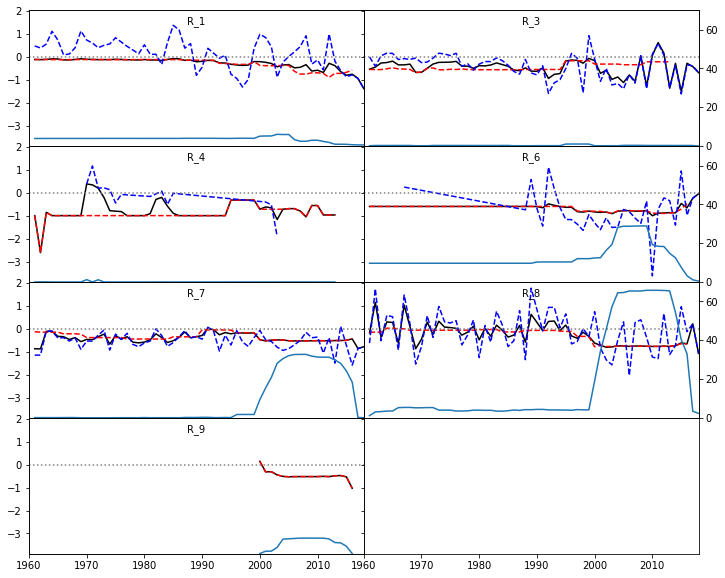

In [25]:
fig, ax=plt.subplots(4,2, sharex='all', sharey='all', figsize=(12,10))
fig.subplots_adjust(hspace=0,wspace=0)
ax = ax.ravel()

total_area={1:86725,3:105111,4:40888,6:11060,7:33959,8:2949,9:51592}

for count, x in enumerate([1,3,4,6,7,8,9]):
    full_temp=full_final[(full_final['REGION_NO']==x)&(full_final['Year']>=1961)]
    geo_temp=geo_final[(geo_final['REGION_NO']==x)&(geo_final['Year']>=1961)]
    glac_temp=glac_final[(glac_final['REGION_NO']==x)&(glac_final['Year']>=1961)]
    ax[count].plot(full_temp['Year'],full_temp['Spec_Massbal'],c='k')
    ax2=ax[count].twinx()
    ax2.plot(full_temp['Year'],(full_temp['Area']/total_area[x])*100)
    ax2.set_ylim([0,70])
    if len(geo_temp) > 0: 
        ax[count].plot(geo_temp['Year'],geo_temp['Spec_Massbal'],c='r',ls='--')
    if len(glac_temp) > 0: 
        ax[count].plot(glac_temp['Year'],glac_temp['Spec_Massbal'],c='b', ls='--')
    ax[count].set_xlim([1960,2018])
    if x not in [3,6,8,9]:
        ax2.get_yaxis().set_visible(False)
    ax[count].axhline(0,ls=':',c=[0.5,0.5,0.5])
    ax[count].text(.5,.9,'R_'+str(x),
        horizontalalignment='center',
        transform=ax[count].transAxes)
    #print(x, np.mean((full_temp['Area']/total_area[x])*100))
    
    #need to set proper labels etc

In [1]:
#%% VALIDATION DATA 

val_fp=sorted(glob.glob(filepath+'/Project_Data/Calibration_Outputs/*.nc'))

zemp_fp=sorted(glob.glob(filepath+'/Project_Data/Calibration_Outputs/ZEMP_Data/*.csv'))


zemp_mass=[]
val_mass=[]
for x in range(len(val_fp)):
    val=nc.Dataset(val_fp[x])
    
    val.variables
    val_massbal=val['massbaltotal_glac_monthly'][:,:,0]
    val_area=val['area_glac_annual'][:,1:,0] #will need to explain why the first year is the one that goes 
    
    
    val_year=val['year'][:]
    zemp=pd.read_csv(zemp_fp[0],skiprows=27)
    #will need to explore/show how to clean columns 
    zemp.columns=zemp.columns.map(lambda t: t.strip())
    zemp=zemp[zemp['Year']>=1980][zemp['Year']<2018]
    
    
    #need to do area weighting for massbal calculations 
    #make all of them into annual and then do area weighting 
    
    massbal_annual=(np.sum(val_massbal.reshape(-1,12),axis=1)).reshape(len(val_massbal),len(val_year))
    val_aw=np.sum(((massbal_annual*val_area)/np.sum(val_area,axis=0)),axis=0)
    
    zemp_mass.append(zemp['INT_mwe'])
    val_mass.append(val_aw)
    plt.plot(val_year,val_aw)
    plt.plot(zemp['Year'],zemp['INT_mwe'])
    plt.show()

#maybe compare the area weighted and non area-weigthed massbal 
val_mean=np.mean(val_mass,axis=1)
zemp_mean=np.mean(zemp_mass,axis=1)
val_std=np.std(val_mass,axis=1)
zemp_std=np.std(zemp_mass,axis=1)

test_val=val_mean[0]
test_zemp=zemp_mean[0]
std_zemp=zemp_std[0]
std_val=val_std[0]

test_zemp-std_zemp <= test_val <= test_zemp+std_zemp

test_val-std_val <= test_zemp <= test_val+std_val

for x in range(len(val_mean)):
    if (val_mean[x]-val_std[x] <= zemp_mean[x] <= val_mean[x]+val_std[x]) or (zemp_mean[x]-zemp_std[x]
                                                                              <= val_mean[x] <= zemp_mean[x]+zemp_std[x]) :
        print('YES')
    else:
        print('NO')

NameError: name 'glob' is not defined

In [3]:
#maybe have exploration of 2 datastets that did not work and what i would do differently next time 

In [6]:
#NEED TO ADDRESS UNCERTAINTY IN ORIGINAL DATA

#WILL NEED TO DO/SHOW ANALYSIS OF VALIDATION DATA AND WHAT HAPPENED TO ALASKA AND SVALBARD 
#ALSO ADDRESS WHAT I WOULD DO DIFFERENTLY NEXT TIME 

#deterime: mass bal sensitivity over time (be clear on eval metrics, maybe cite that paper that looks at pygem uncertainty)
# mass bal sensitivity with and without precipitation increase 
# volume decrase over 100 yrs (volume and volume %) 
# make map visualizations for entire 100 yrs for each glacier and those nice barplots 
#address whether or not equilibirium is reached 

model_fp=sorted(glob.glob(filepath+'/Project_Data/Modelled_Data/*.nc'))

#can make a function to select for and filter based on what im interested in finding 

#first thing first: analyze each region individually, and then record all necessary data for iner-regional comparison? 
#need to store: annual mass balance, annual volume, annual area, magnitude of all components 
#will need to figure out best way to identify the model iteration 

#FUNCTION WILL JUST EXTRACT THE DATA, SO YOU CAN LOOK AT IT

#maybe just glob glob on specific file in nested for loop: 1st nest retion, 2nd nest temp and ppt 
#in each region, for each iteration, do visualization of glaciers 
# for each region (for all iterations): determine sensitivity, plot volume change, 

full_glac=[]
full_annual=[]

for reg in [3,4,6,8,9]:
    print(reg)
    region_fp=[x for x in model_fp if 'R'+str(reg) in x]
    reg_glac=[]
    reg_annual=[]
    for temp_sim in [0,1,2,3]:
        prec_sim=temp_sim*4 
        scen=[x for x in region_fp if 'T'+str(temp_sim)+'_P'+str(prec_sim) in x]
        print('T'+str(temp_sim)+'_P'+str(prec_sim))
        scen=nc.Dataset(scen[0])  
        massbal=scen['massbaltotal_glac_monthly'][:,:1200,0]
        area=scen['area_glac_annual'][:,1:101,0]
        volume=scen['volume_glac_annual'][:,:100,0]
        glactable=scen['glacier_table'][:]
        year=np.array(range(2000,2100))
        #get them into annual 
        massbal_annual=np.sum(massbal.reshape(-1,12),axis=1).reshape(len(massbal),len(year))
        massbal_glac=np.array([np.mean(massbal_annual, axis=1)])
        massbal_glac=np.append(massbal_glac,np.array([np.mean(area, axis=1)]),axis=0)
        massbal_glac=np.append(massbal_glac,(glactable[:,2:4]).T, axis=0)
        reg_glac.append(['T'+str(temp_sim)+'_P'+str(prec_sim),massbal_glac])
        
        #area_weighted + volume 
        
        massbal_aw=np.array([np.sum(((massbal_annual*area)/np.sum(area,axis=0)),axis=0)])
        massbal_aw=np.append(massbal_aw,np.array([np.mean(volume,axis=0)]),axis=0)
        reg_annual.append(['T'+str(temp_sim)+'_P'+str(prec_sim),massbal_aw])
        
        if temp_sim in [1,2,3]:
            scen=[x for x in region_fp if 'T'+str(temp_sim)+'_P0' in x]
            print('T'+str(temp_sim)+'_P0')
            scen=nc.Dataset(scen[0])  
            massbal=scen['massbaltotal_glac_monthly'][:,:1200,0]
            area=scen['area_glac_annual'][:,1:101,0]
            massbal_annual=np.sum(massbal.reshape(-1,12),axis=1).reshape(len(massbal),len(year))
            reg_annual.append(['T'+str(temp_sim)+'_P0',
                               np.array([np.sum(((massbal_annual*area)/np.sum(area,axis=0))
                                               ,axis=0)])])
            
    full_glac.append([reg, reg_glac])
    full_annual.append([reg,reg_annual])
        

3
T0_P0
T1_P4
T1_P0
T2_P8
T2_P0
T3_P12
T3_P0
4
T0_P0
T1_P4
T1_P0
T2_P8
T2_P0
T3_P12
T3_P0
6
T0_P0
T1_P4
T1_P0
T2_P8
T2_P0
T3_P12
T3_P0
8
T0_P0
T1_P4
T1_P0
T2_P8
T2_P0
T3_P12
T3_P0
9
T0_P0
T1_P4
T1_P0
T2_P8
T2_P0
T3_P12
T3_P0


plotting region:  3
scenario:  T0_P0


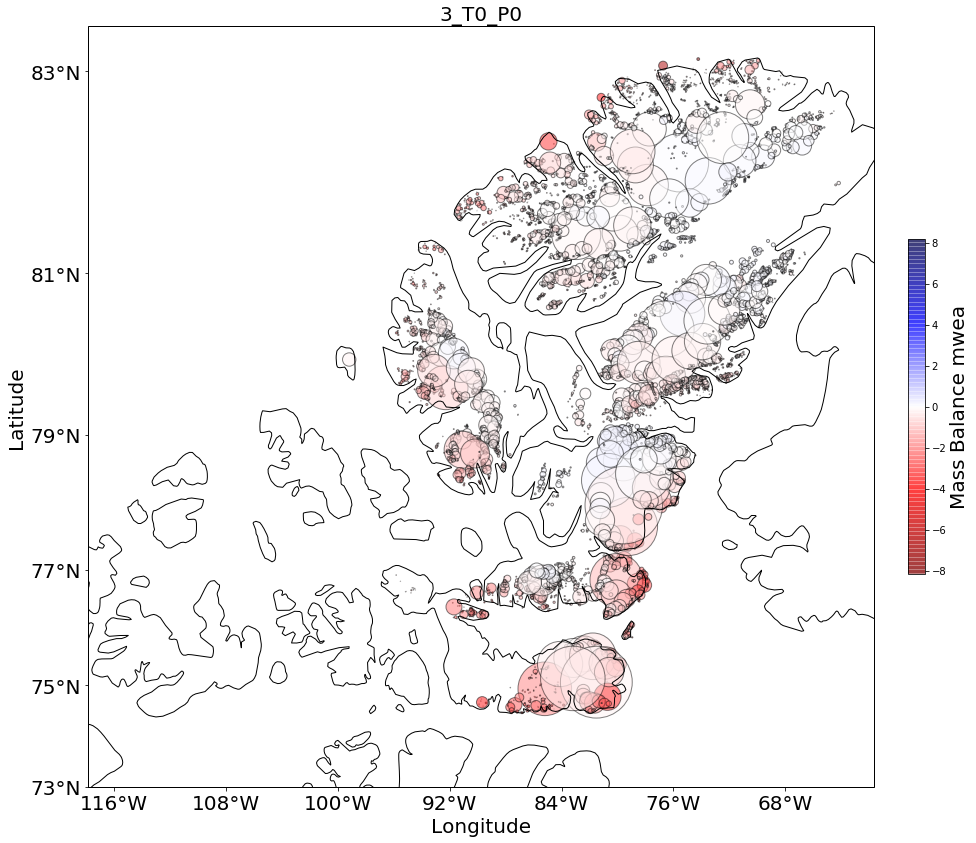

scenario:  T1_P4


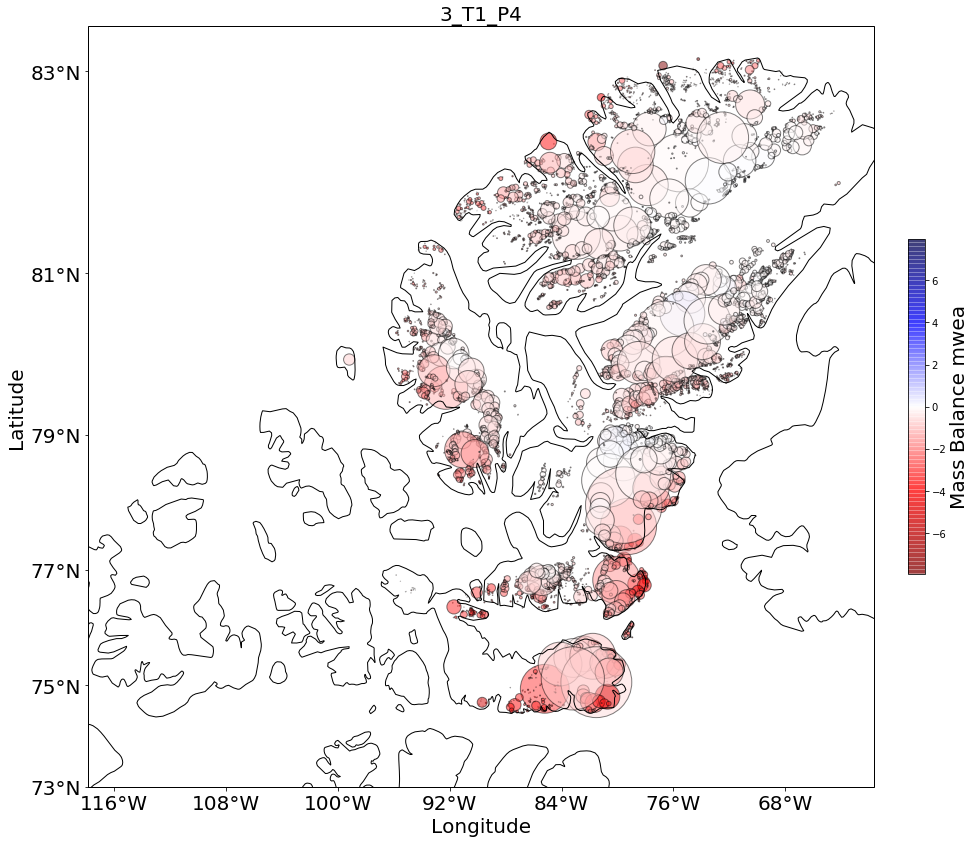

scenario:  T2_P8


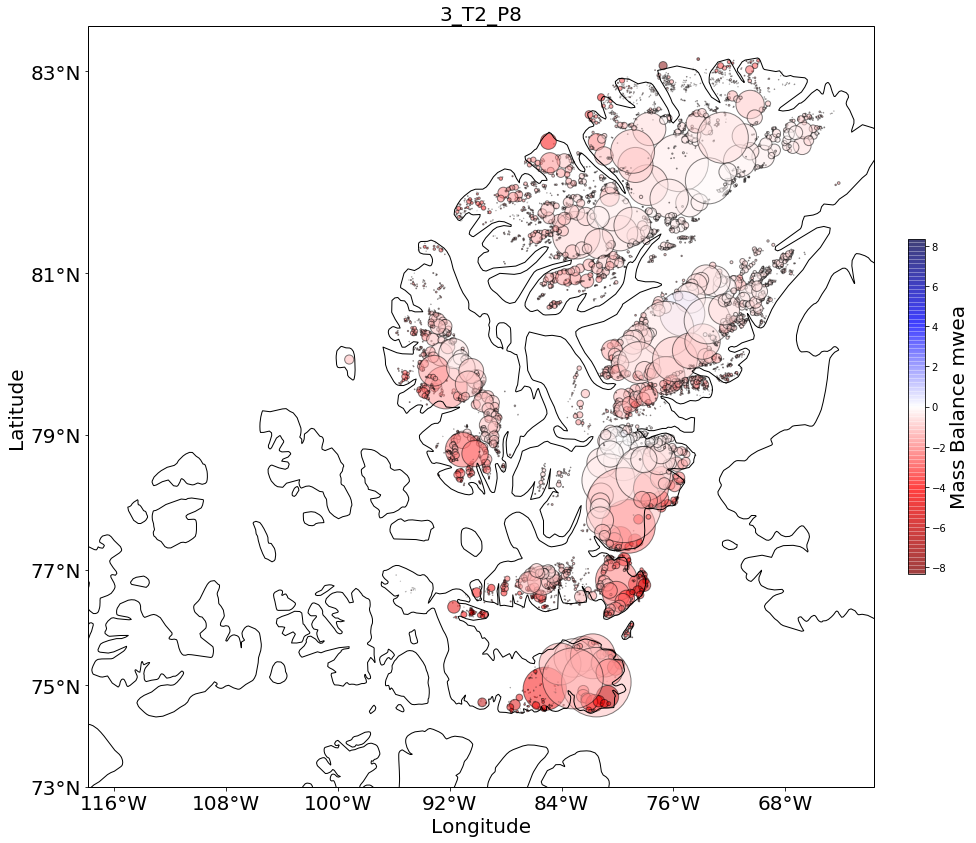

scenario:  T3_P12


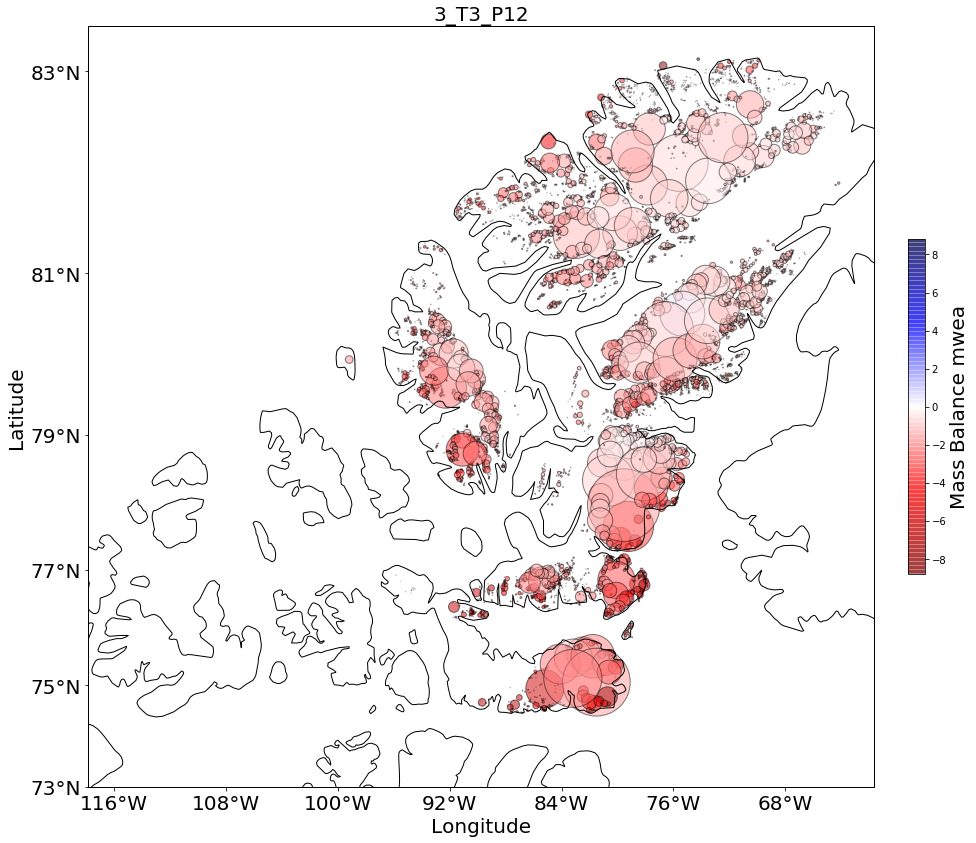

plotting region:  4
scenario:  T0_P0


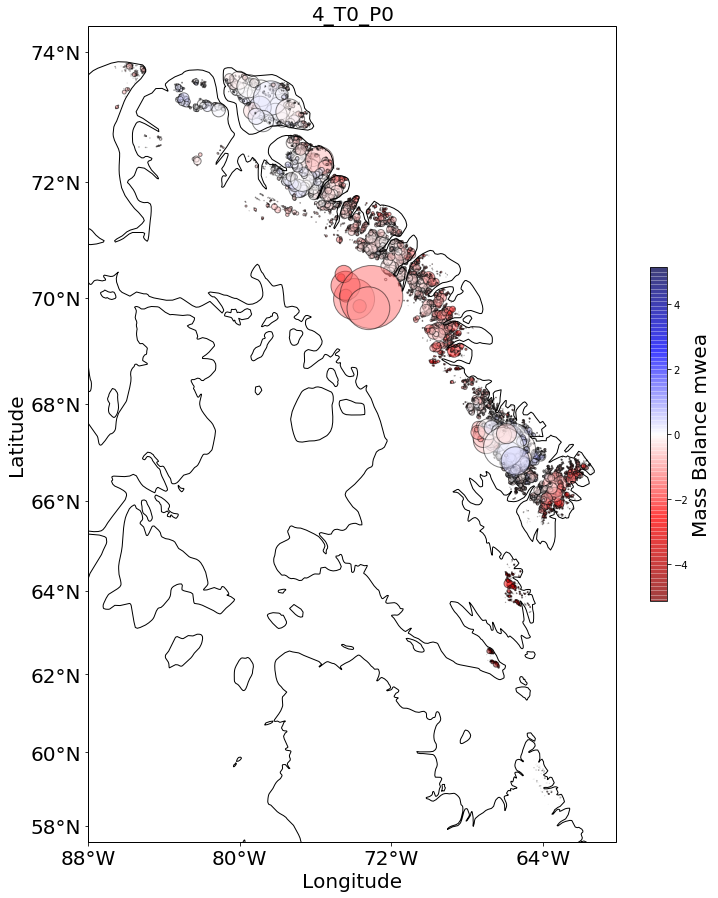

scenario:  T1_P4


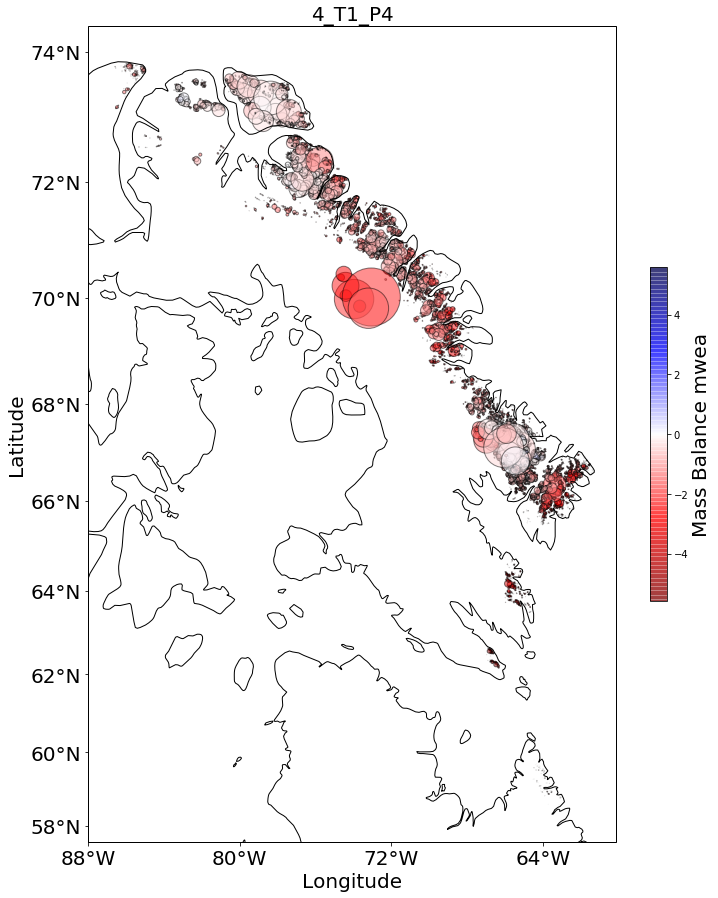

scenario:  T2_P8


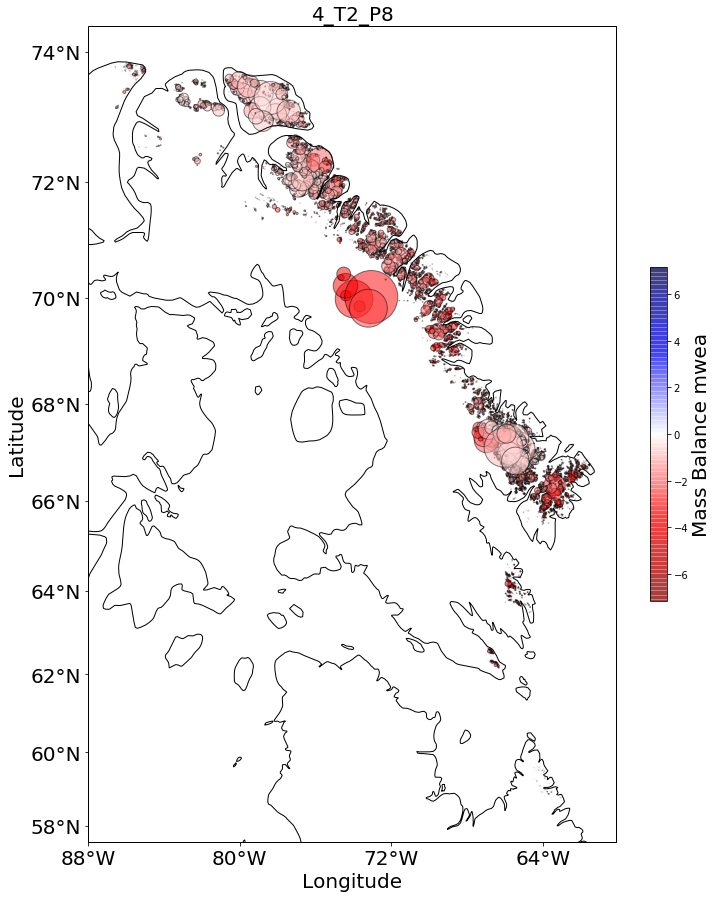

scenario:  T3_P12


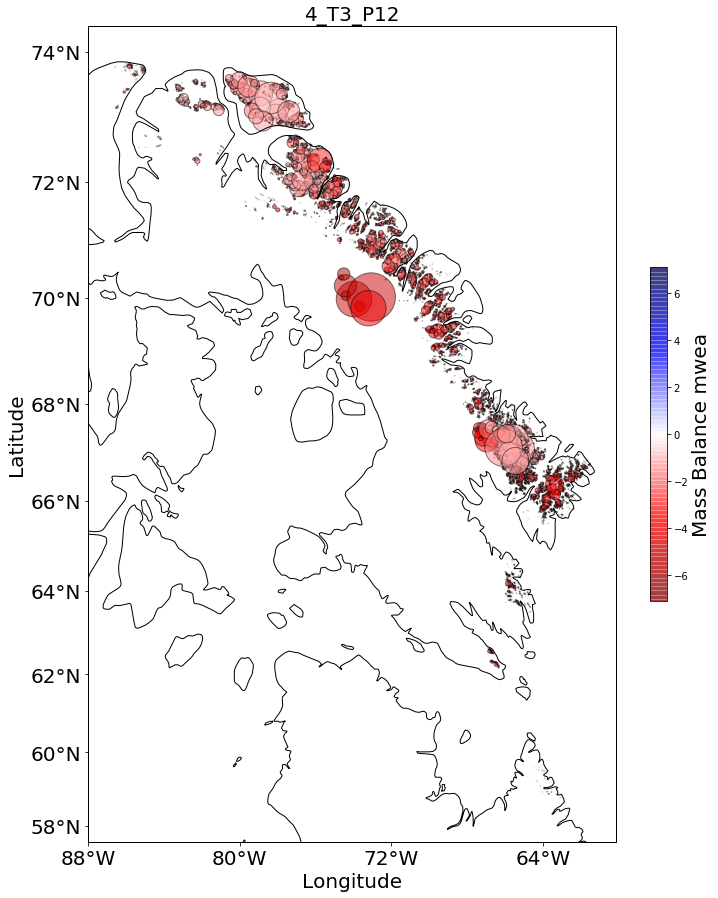

plotting region:  6
scenario:  T0_P0


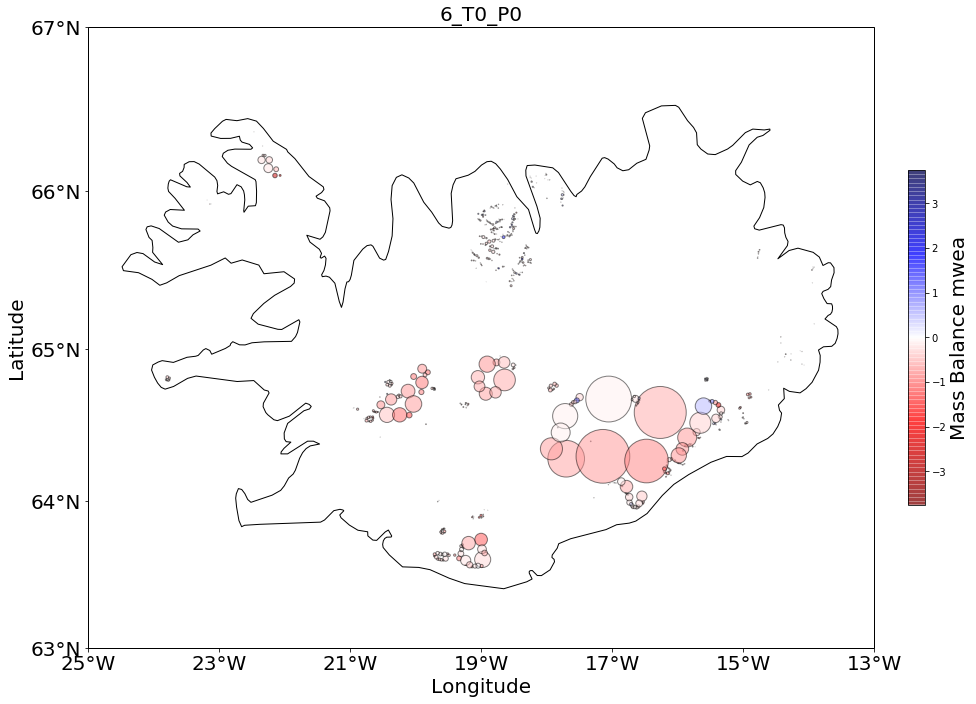

scenario:  T1_P4


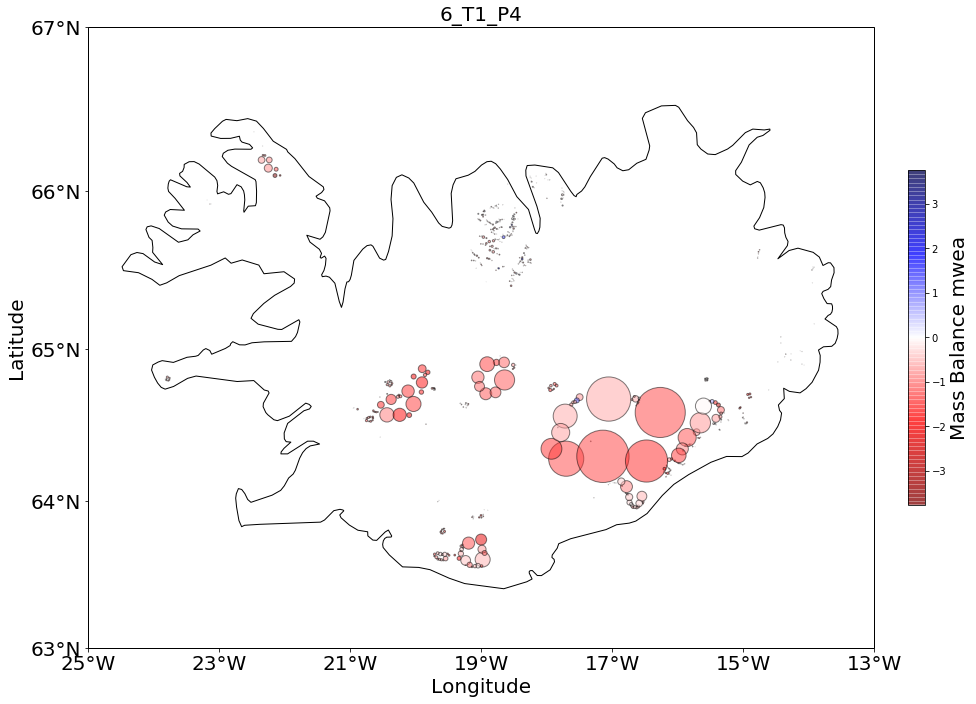

scenario:  T2_P8


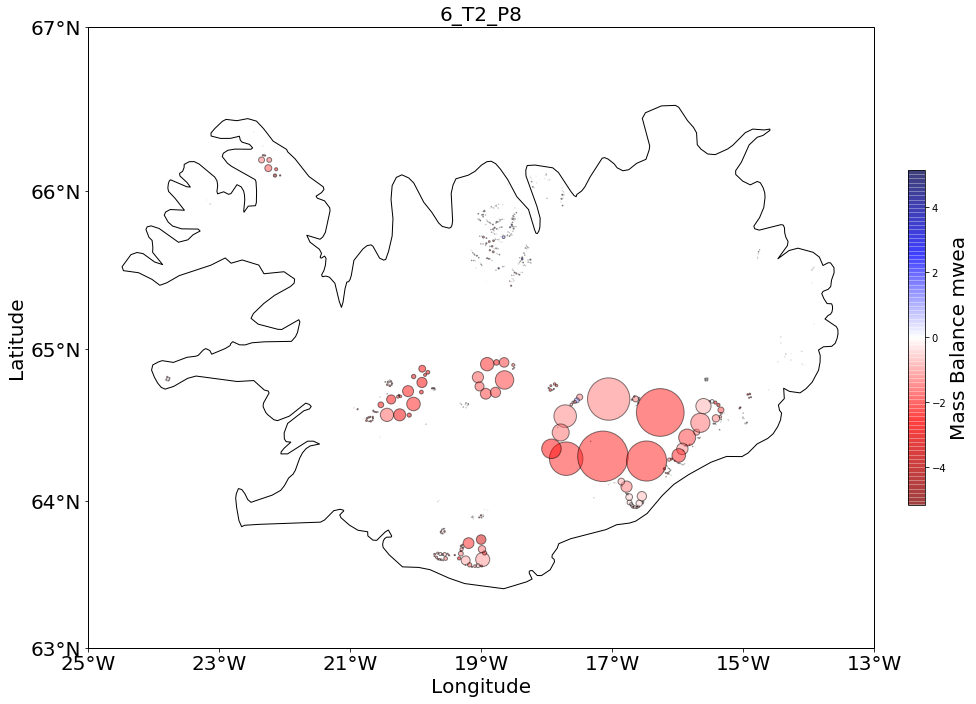

scenario:  T3_P12


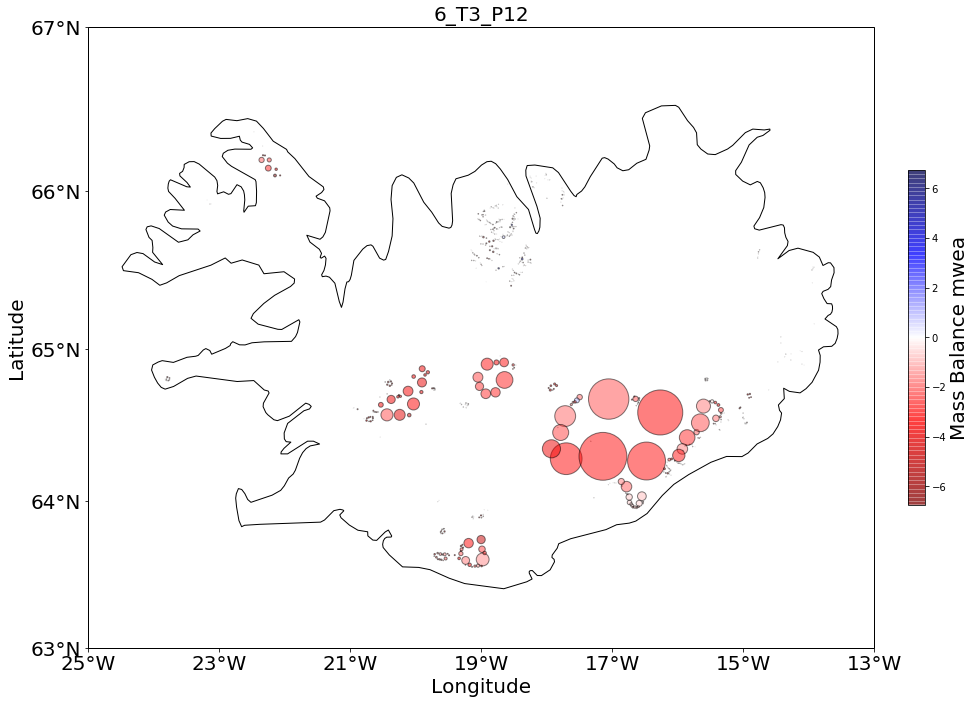

plotting region:  8
scenario:  T0_P0


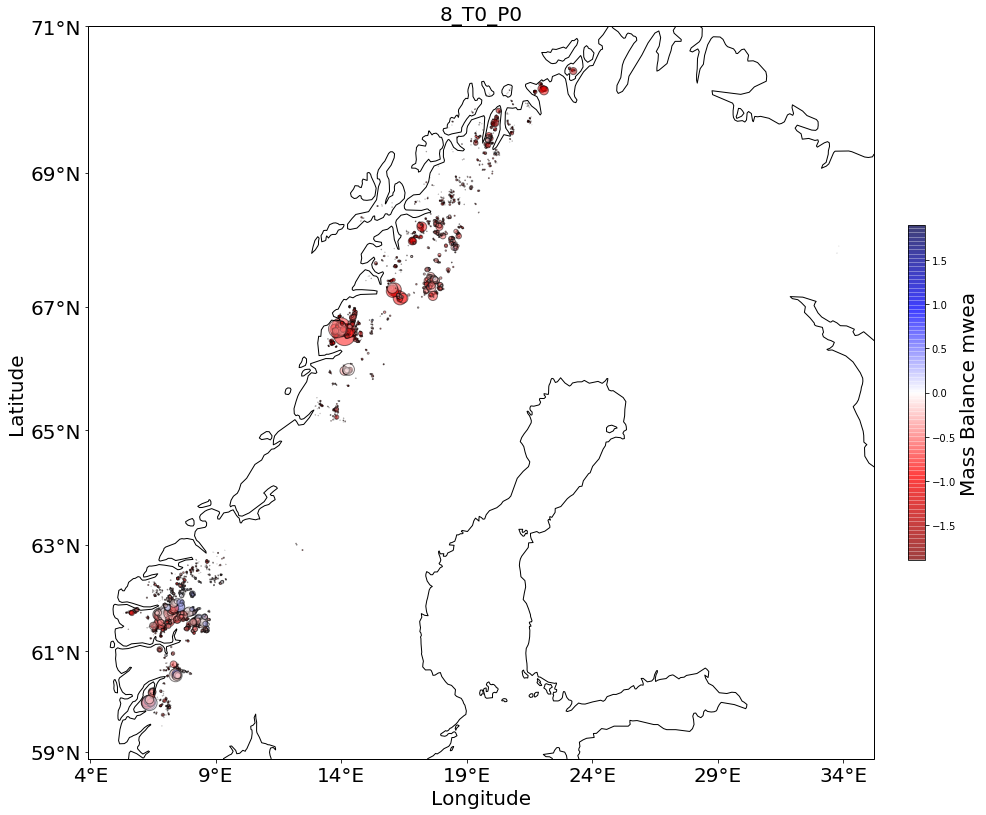

scenario:  T1_P4


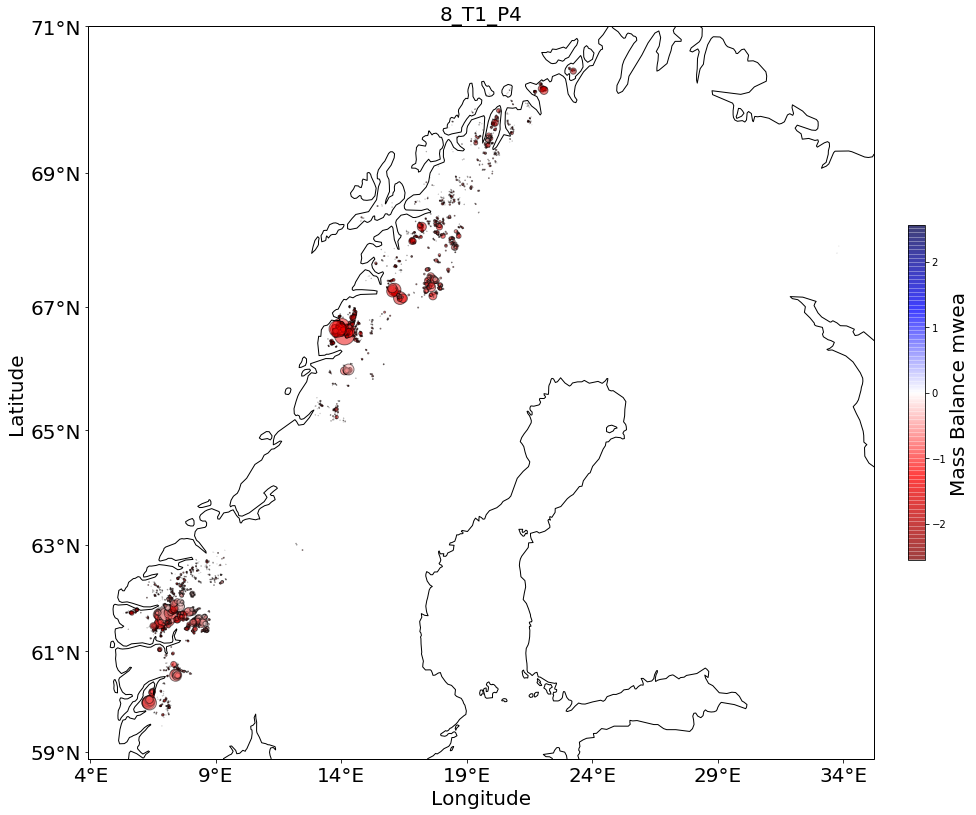

scenario:  T2_P8


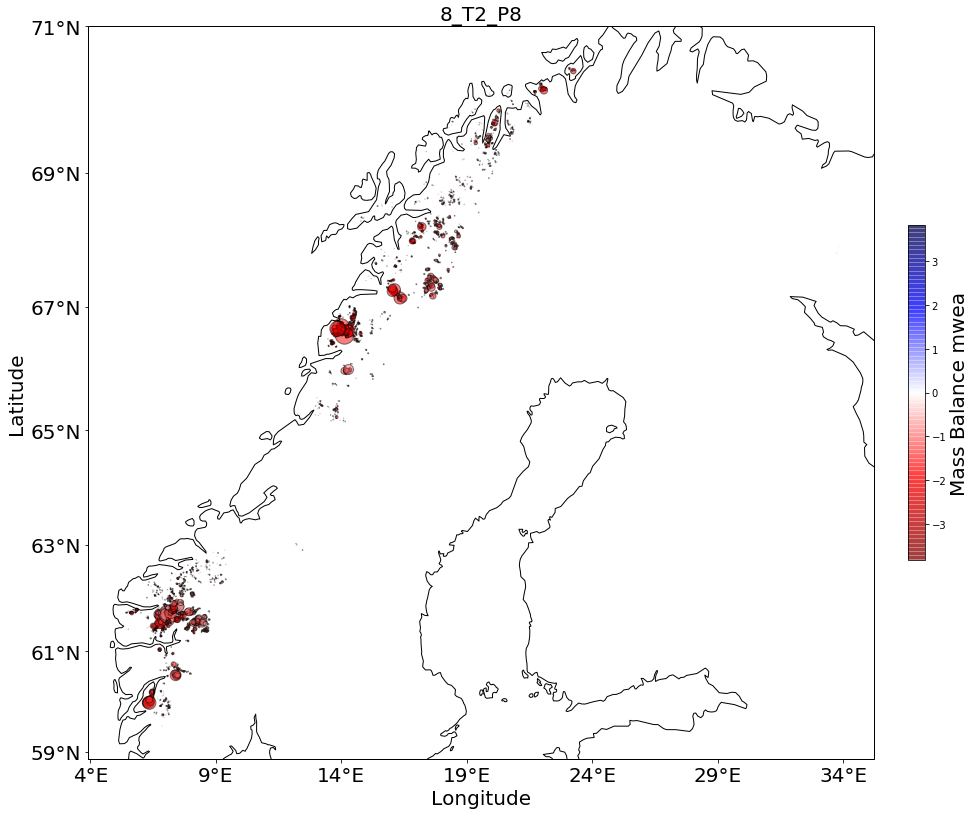

scenario:  T3_P12


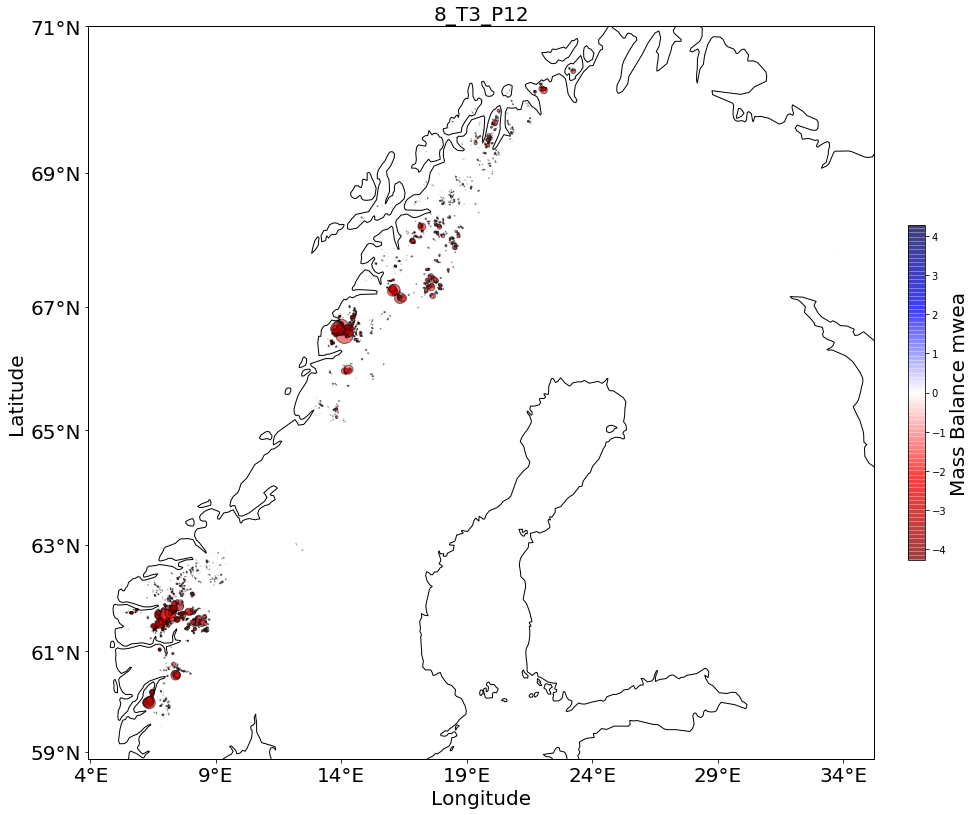

plotting region:  9
scenario:  T0_P0


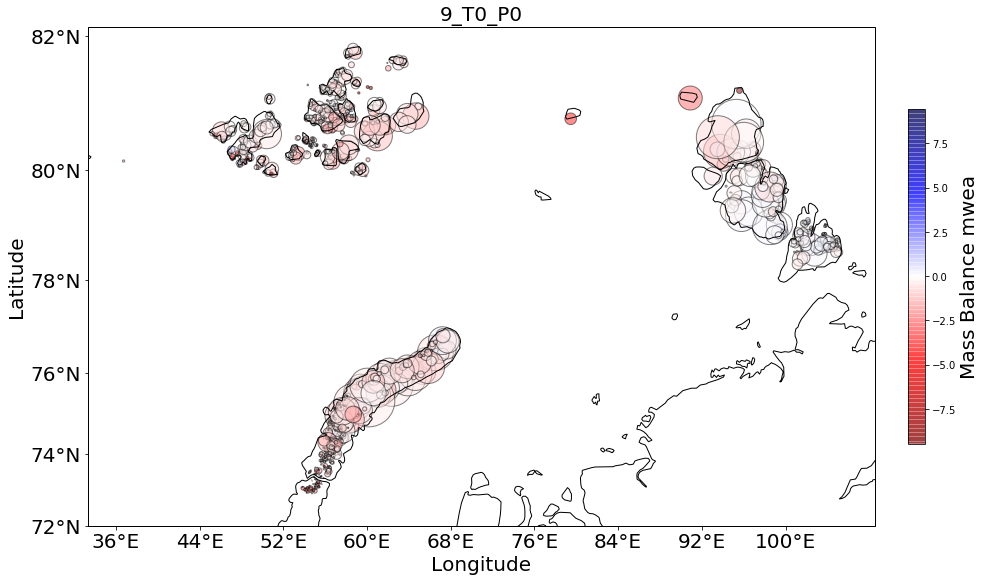

scenario:  T1_P4


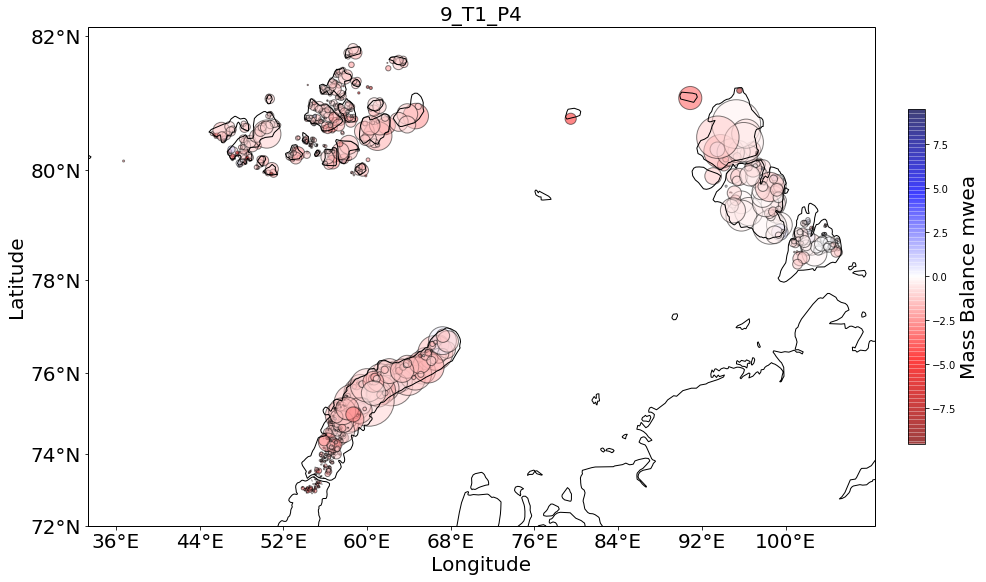

scenario:  T2_P8


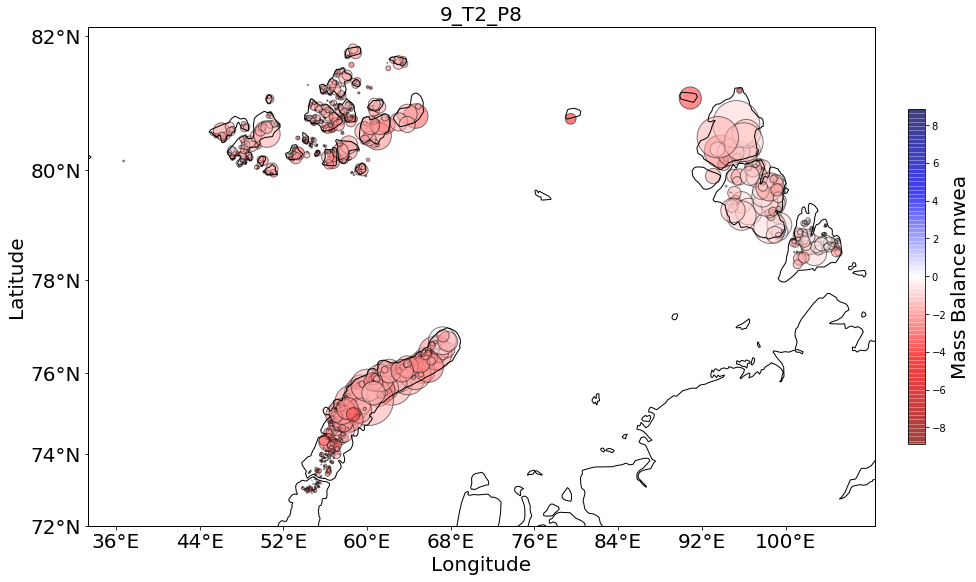

scenario:  T3_P12


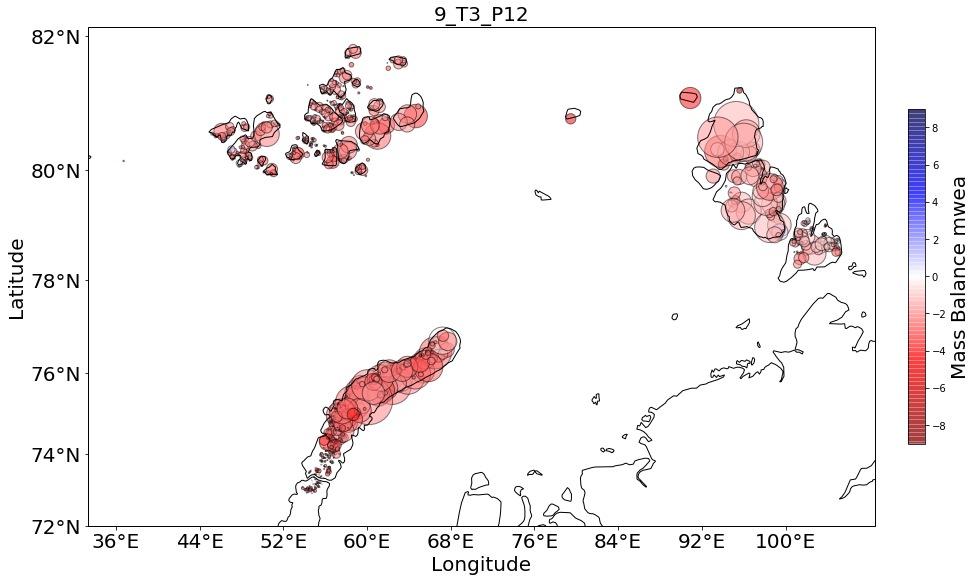

In [7]:
#each region with glaciers, outlines, and sized mass bal coded 
    
#mass bal sensitivity for each reigon, plotted 
#massbal for each region and scenario, over 100 yrs 
#volume for each reigion and scenario, over 100 yrs 
#impact of ppt analyzed 
    

#MAKE A MAP PLOTTING FUNCTION
    
land_50m = car.feature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='k',
                                        facecolor='none')

proj_crs = ccrs.PlateCarree()
projection = ccrs.Mercator()
#need to make this more streamline.... have idx as id etc, 
#for min/max values on cbar, have option where per individual plot, per region or for all samples 



for x in range(len(full_glac)):
    reg_test=full_glac[x][1]
    print('plotting region: ', full_glac[x][0])
    east = int(round(reg_test[1][1][2].min())) - 1
    west = int(round(reg_test[1][1][2].max())) + 1
    south = int(round(reg_test[1][1][3].min())) - 1
    north = int(round(reg_test[1][1][3].max())) + 1
    mag=2
    if full_glac[x][0] == 6: 
        xtick=2
        ytick=1
    elif full_glac[x][0] ==8:
        xtick=5
        ytick=2
        mag=10
    else:
        xtick=8
        ytick=2
    
    for y in range(len(reg_test)): 
        temp=reg_test[y][1]
        print('scenario: ', reg_test[y][0])

        fig, axs1=plt.subplots( figsize=(15,15))
        axs1 = plt.axes(projection=projection)
        axs1.add_feature(land_50m)
        scat=axs1.scatter(temp[2],temp[3],s=temp[1]*mag,c=temp[0],transform=proj_crs, 
                     alpha=0.5,edgecolor='black',cmap='seismic_r',vmin=min(temp[0]),
                     vmax=abs(min(temp[0])))
        cbar=plt.colorbar(scat, fraction=0.02, pad=0.04)
        axs1.set_xticks(np.arange(east,west+1,xtick), crs=ccrs.PlateCarree())
        axs1.set_yticks(np.arange(south,north+1,ytick), crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(zero_direction_label=True)
        lat_formatter = LatitudeFormatter()
        axs1.xaxis.set_major_formatter(lon_formatter)
        axs1.yaxis.set_major_formatter(lat_formatter)
        plt.xlabel('Longitude', fontsize=20)
        plt.ylabel('Latitude', fontsize=20)
        plt.yticks(fontsize=20)
        plt.xticks(fontsize=20)
        cbar.set_label('Mass Balance mwea', fontsize=20)
        plt.title(str(full_glac[x][0])+'_'+str(reg_test[y][0]), fontsize=20)
        plt.show()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-

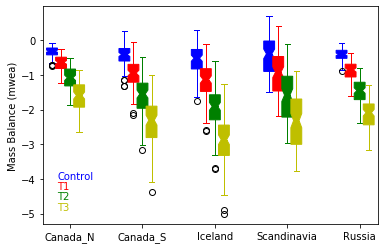

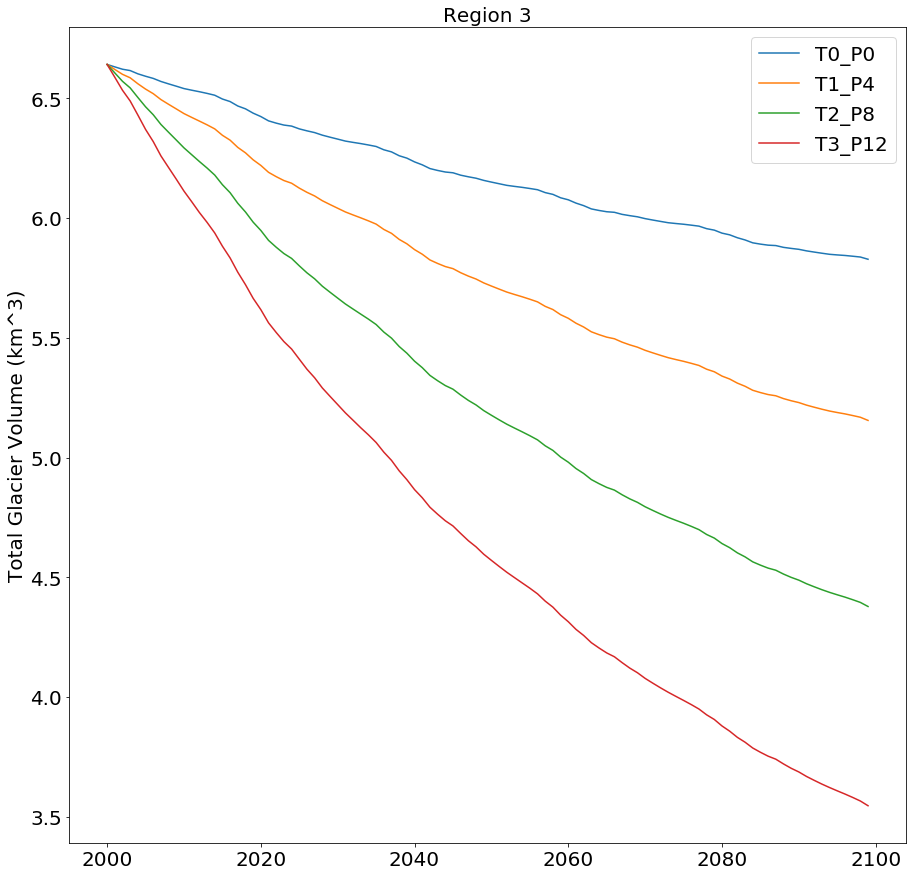

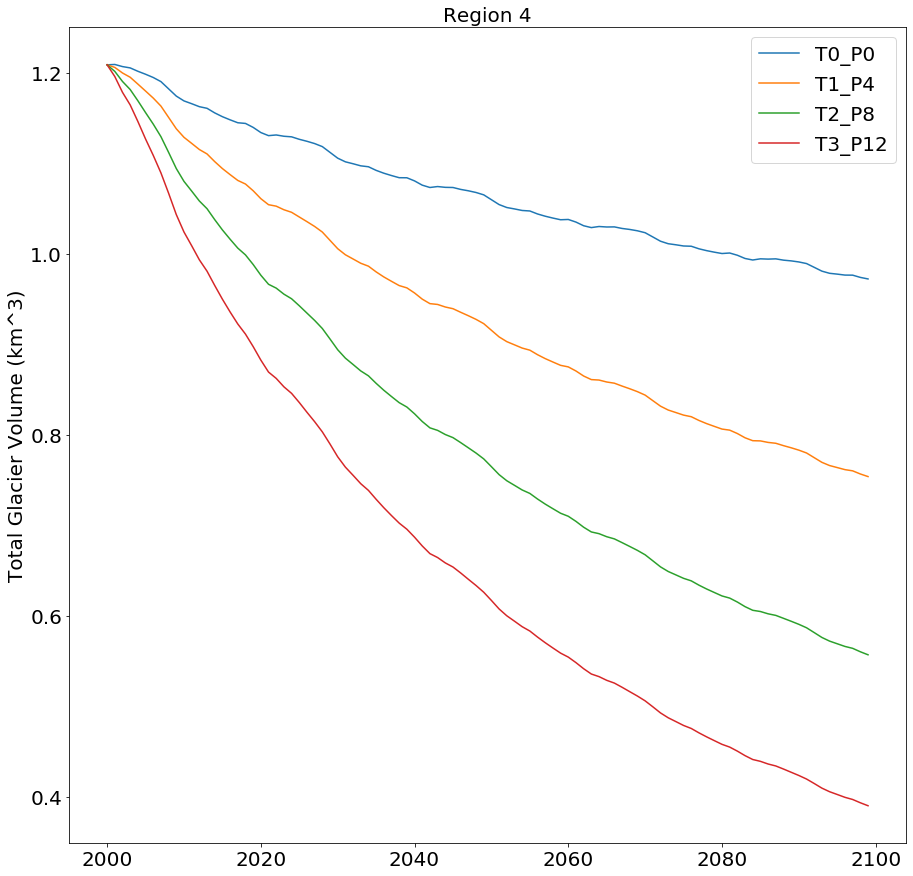

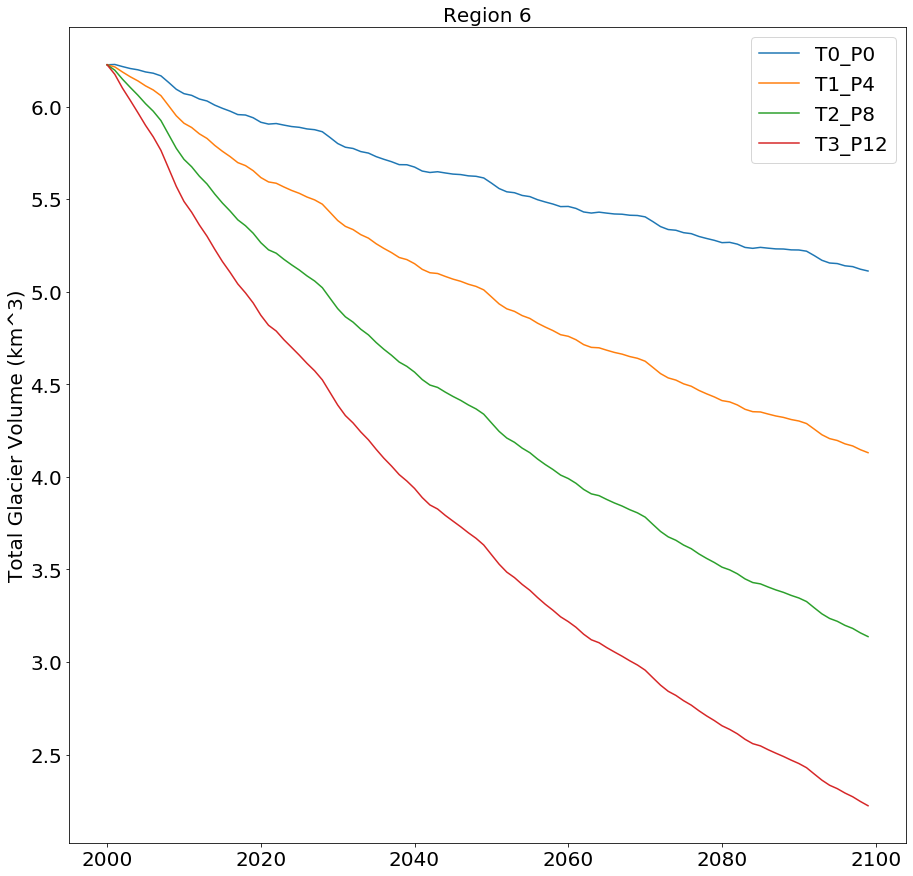

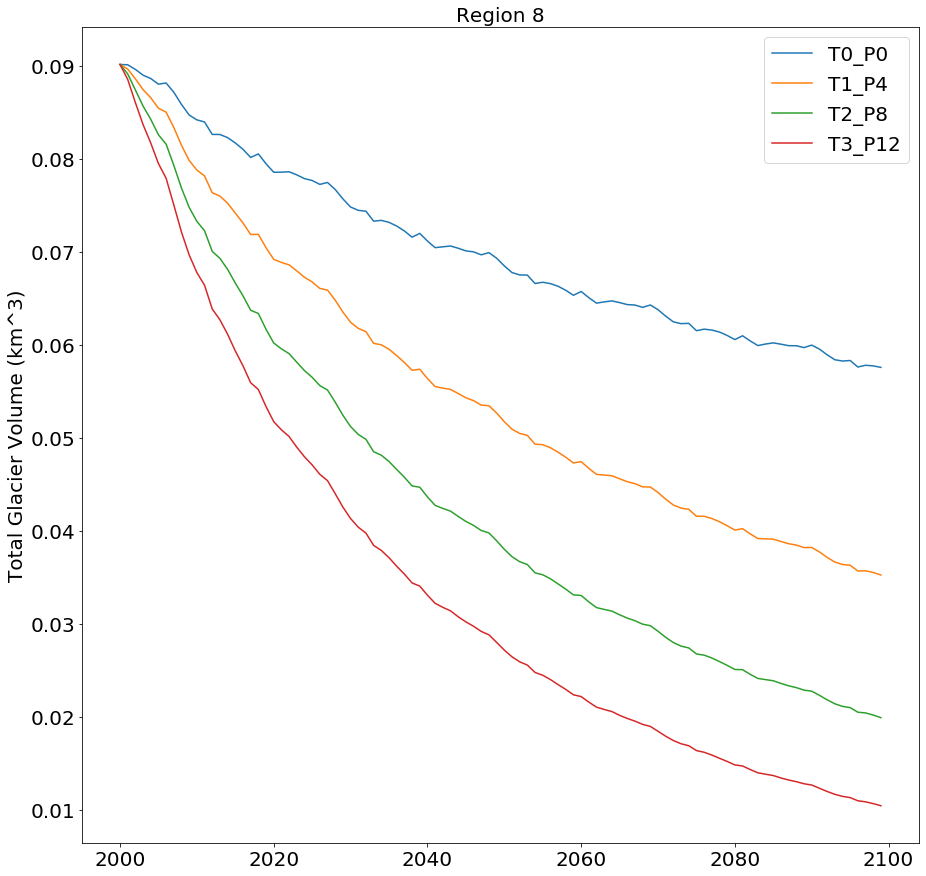

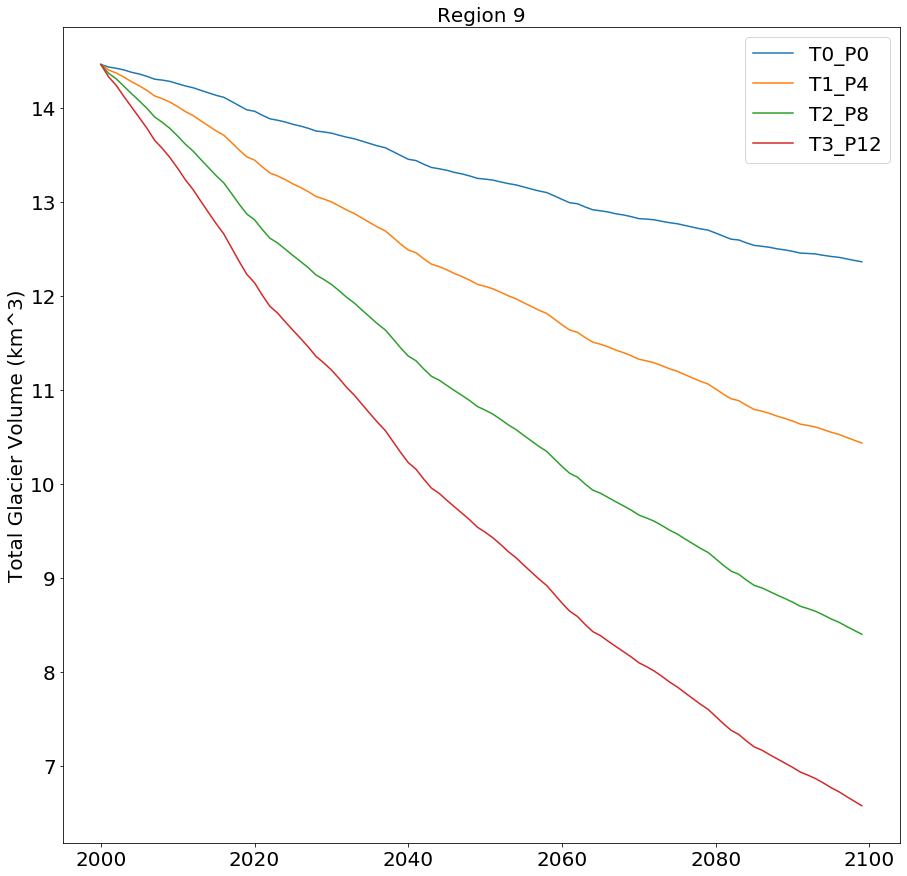

In [8]:
    
cols={1:['b','Control'],2:['r','T1'],3:['g','T2'],4:['y',"T3"]}
positionss=list(range(len(full_annual)))
positionss=[i*4 for i in positionss] 
fig2, ax2=plt.subplots()
sens=[]
for x in range(len(full_annual)): 
    position=positionss[x]
    region=full_annual[x][1]
    sens_calc=[]
    colz=1
    fig,ax=plt.subplots( figsize=(15,15))
    for y in [0,1,3,5]: 
        bp=ax2.boxplot(region[y][1][0], positions=[position], widths=0.6,
                    notch=True,patch_artist=True)
        for t in ['boxes','medians','whiskers','caps','fliers']:
            plt.setp(bp[t], color=cols[colz][0])
        position+=0.5
        colz+=1
        
        sens_calc.append(region[y][1][0])
        ax.plot(list(range(2000,2100)), region[y][1][1], label=region[y][0])
        
    ax.set_ylabel('Total Glacier Volume (km^3)', fontsize=20)
    ax.set_title('Region '+ str(full_annual[x][0]),fontdict={'fontsize':20})
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    ax.legend(fontsize=20)
    fig.show()
    sens.append(np.mean(sens_calc))
ax2.set_xticks([i+1 for i in positionss])
ax2.set_xticklabels(['Canada_N','Canada_S','Iceland','Scandinavia','Russia'])
ax2.set_ylabel('Mass Balance (mwea)')
pos=-4
for t in cols:
    ax2.text(0.3,pos,cols[t][1],c=cols[t][0])
    pos-=0.3
fig2.show()